In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

import math
import scipy.stats as st

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

In [2]:
# Ouverture du fichier
data =pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t', encoding='utf-8' , parse_dates=[3,4,5,6], index_col='code',dtype={'code':str})

In [3]:
# identifier le nombre de lignes et le nombre de colonnes 
data.shape

(1829437, 185)

In [4]:
# Info générale 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1829437 entries, 0000000000017 to 999999999999999
Columns: 185 entries, url to carnitine_100g
dtypes: datetime64[ns, UTC](2), float64(123), object(60)
memory usage: 2.5+ GB


In [5]:
# Types dzs valeurs 
data.dtypes

url                                object
creator                            object
created_t                          object
created_datetime      datetime64[ns, UTC]
last_modified_t                    object
                             ...         
choline_100g                      float64
phylloquinone_100g                float64
beta-glucan_100g                  float64
inositol_100g                     float64
carnitine_100g                    float64
Length: 185, dtype: object

In [6]:
# Affichage toute les colonnes 
pd.set_option('display.max_rows', 185)

In [7]:
# Beaucoup de valeurs vides
data.head().T

code,0000000000017,0000000000031,000000000003327986,000000000004622327,0000000000100
url,http://world-en.openfoodfacts.org/product/0000...,http://world-en.openfoodfacts.org/product/0000...,http://world-en.openfoodfacts.org/product/0000...,http://world-en.openfoodfacts.org/product/0000...,http://world-en.openfoodfacts.org/product/0000...
creator,kiliweb,isagoofy,kiliweb,kiliweb,del51
created_t,1529059080,1539464774,1574175736,1619501895,1444572561
created_datetime,2018-06-15 10:38:00+00:00,2018-10-13 21:06:14+00:00,2019-11-19 15:02:16+00:00,2021-04-27 05:38:15+00:00,2015-10-11 14:09:21+00:00
last_modified_t,1561463718,1539464817,1574175737,1619501897,1444659212
last_modified_datetime,2019-06-25 11:55:18+00:00,2018-10-13 21:06:57+00:00,2019-11-19 15:02:17+00:00,2021-04-27 05:38:17+00:00,2015-10-12 14:13:32+00:00
product_name,Vitória crackers,Cacao,Filetes de pollo empanado,Hamburguesas de ternera 100%,moutarde au moût de raisin
abbreviated_product_name,NaN,NaN,NaN,NaN,NaN
generic_name,NaN,NaN,NaN,NaN,NaN
quantity,NaN,130 g,NaN,NaN,100g


In [8]:
# Sauvegarde du dataset
df = data.copy()

In [9]:
# détermination de certaines colonnes mal ou non renseignée
(df.isna().sum()/df.shape[0]).sort_values(ascending = True)


url                                           0.000000
created_t                                     0.000000
created_datetime                              0.000000
last_modified_t                               0.000000
last_modified_datetime                        0.000000
states                                        0.000000
states_tags                                   0.000000
states_en                                     0.000000
creator                                       0.000002
pnns_groups_2                                 0.000442
countries                                     0.003059
countries_en                                  0.003062
countries_tags                                0.003062
pnns_groups_1                                 0.009678
product_name                                  0.042956
energy_100g                                   0.206388
proteins_100g                                 0.210207
fat_100g                                      0.210811
carbohydra

In [10]:
# Élimination les colonnes remplies de moins de 95%
df1 = df[df.columns[(df.isna().sum()/df.shape[0])<0.95]]

In [11]:
# De l'autre côté on va garder que les lignes ayant la valeur de "nutriscore"
ligne_nutriscore =[x for x  in df1.columns if 'nutri' in x ]
ligne_nutriscore

['nutriscore_score',
 'nutriscore_grade',
 'image_nutrition_url',
 'image_nutrition_small_url',
 'nutrition-score-fr_100g']

In [12]:
# Observation des lignes contenant "nutri"
df1[ligne_nutriscore]

,nutriscore_score,nutriscore_grade,image_nutrition_url,image_nutrition_small_url,nutrition-score-fr_100g
code,,,,,
0000000000017,NaN,NaN,NaN,NaN,NaN
0000000000031,NaN,NaN,NaN,NaN,NaN
000000000003327986,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN
000000000004622327,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN
0000000000100,18.0,d,NaN,NaN,18.0
...,...,...,...,...,...
9999999910128,NaN,NaN,NaN,NaN,NaN
999999999,NaN,NaN,NaN,NaN,NaN
9999999990397,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN


In [13]:
# On vois que 2 colonnes sont complètement identiques, 1 colonne pour afficher le niveau et 2 url
for i in ligne_nutriscore:
    print(i, df1[i].unique())


nutriscore_score [ nan  18.   1.  14.  -2.   4.   0.  -4.  15.  17.  21.   2.   3.  29.
   6.  22.   9.  -5.   5.  28.  23.  11.  20.  12.  16.  26.  19.  24.
  13.  36.  -3.  27.  10.   7.   8.  25.  -7.  -6.  -1.  -8.  -9. -11.
  30. -10. -13. -12. -14.  33.  31.  34.  32.  35.  37. -15.  40.  39.
  38.]
nutriscore_grade [nan 'd' 'b' 'a' 'c' 'e']
image_nutrition_url [nan
 'https://static.openfoodfacts.org/images/products/000/000/000/003327986/nutrition_es.5.400.jpg'
 'https://static.openfoodfacts.org/images/products/000/000/000/004622327/nutrition_es.5.400.jpg'
 ...
 'https://static.openfoodfacts.org/images/products/999/999/990/1/nutrition_en.5.400.jpg'
 'https://static.openfoodfacts.org/images/products/999/999/999/0397/nutrition_fr.5.400.jpg'
 'https://static.openfoodfacts.org/images/products/999/999/999/9994/nutrition_fr.14.400.jpg']
image_nutrition_small_url [nan
 'https://static.openfoodfacts.org/images/products/000/000/000/003327986/nutrition_es.5.200.jpg'
 'https://static.openf

In [14]:
# Suppression des np.NaN et 3 colonnes inutiles pour notre analyse 
df1.drop(columns=['image_nutrition_url','image_nutrition_small_url','nutriscore_score'], inplace=True)
df1 = df1[df1['nutrition-score-fr_100g'].notna()]

<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='Density'>

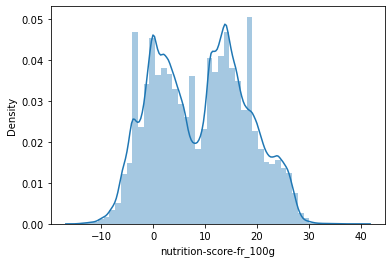

In [15]:
plt.figure()
sns.distplot(df1['nutrition-score-fr_100g'])

In [16]:
# La taille du dataset en ce moment
df2 = df1.copy()
df2.shape

(675587, 75)

In [17]:
# Description complète du jeu de données numériques
df2.describe()

,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nova_group,ecoscore_score_fr,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,3.466980e+05,481124.000000,481124.000000,481124.000000,453525.000000,341195.000000,1.086340e+05,6.342280e+05,6.738710e+05,673828.000000,...,381787.000000,673829.000000,674273.000000,674273.000000,183360.000000,186595.000000,79584.000000,236302.000000,231272.000000,675587.000000
mean,9.956275e+01,2.151406,0.019650,0.071451,3.401455,46.139343,1.121466e+03,2.977834e+02,1.234195e+03,16.599595,...,5.509697,8.882034,3.024109,1.209729,0.156047,0.019553,0.378839,0.166222,0.012692,9.162459
std,2.795479e+03,3.025343,0.140698,0.306747,0.967478,24.861987,3.418146e+03,7.217837e+03,2.932442e+04,1246.200623,...,1618.413812,211.295211,1222.678621,489.071462,28.880233,1.209850,7.040902,5.175538,2.182831,8.871865
min,0.000000e+00,0.000000,0.000000,0.000000,1.000000,-23.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,-20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,2.800000e+01,0.000000,0.000000,0.000000,3.000000,30.000000,4.240000e+02,1.120000e+02,4.600000e+02,1.180000,...,0.000000,2.000000,0.100000,0.040000,0.000000,0.000000,0.086000,0.000000,0.000000,2.000000
50%,5.100000e+01,1.000000,0.000000,0.000000,4.000000,41.000000,1.000000e+03,2.680000e+02,1.110000e+03,8.100000,...,1.600000,6.150000,0.607500,0.243000,0.000000,0.000000,0.169000,0.038000,0.000960,10.000000
75%,1.130000e+02,3.000000,0.000000,0.000000,4.000000,65.000000,1.641000e+03,4.070000e+02,1.695000e+03,23.000000,...,3.600000,12.500000,1.355000,0.542000,0.000106,0.003400,0.300000,0.110000,0.002400,16.000000
max,1.001000e+06,39.000000,2.000000,6.000000,4.000000,125.000000,1.094259e+06,4.766577e+06,1.994336e+07,999999.000000,...,999999.000000,173000.000000,999999.000000,399999.600000,11800.000000,430.000000,875.000000,794.000000,940.000000,40.000000


In [18]:
# Observations d'une valeur  très importante - "nova"
nova_gr=[n_group for n_group in df2.columns if 'nova' in n_group]
nova_gr

['nova_group']

In [19]:
# répartition par classe et leurs quantité
df2[nova_gr].value_counts()

nova_group
4.0           289186
3.0           107871
1.0            50648
2.0             5820
dtype: int64

In [20]:
# Nombre des valeurs manquants 
df2['nova_group'].isna().sum()

222062

In [21]:
# On va croiser avec le "nutriscore" pour trouver la moyenne de 'nova' sur chaque colonne et on va remplacer la valeur
nova_association = df2[['nova_group','nutrition-score-fr_100g']].sample(10)
nova_association

,nova_group,nutrition-score-fr_100g
code,,
7708227055072,3.0,13.0
8005658008806,4.0,5.0
3252950032014,4.0,15.0
0757645013505,4.0,24.0
0017400140472,1.0,-2.0
04656702268,4.0,19.0
8410152012004,NaN,15.0
0034325047877,4.0,22.0
80866879,NaN,12.0


In [22]:
# Tableau d'association  
tabl = df2.groupby(by='nutrition-score-fr_100g')['nova_group'].agg('mean')
tabl

nutrition-score-fr_100g
-15.0    1.000000
-14.0    1.263158
-13.0    1.253846
-12.0    1.460396
-11.0    1.699301
-10.0    1.730323
-9.0     1.770257
-8.0     1.542214
-7.0     1.712008
-6.0     1.745038
-5.0     2.172691
-4.0     2.191929
-3.0     2.853189
-2.0     3.072593
-1.0     2.907685
 0.0     2.962503
 1.0     3.376509
 2.0     3.481092
 3.0     3.513805
 4.0     3.434783
 5.0     3.387230
 6.0     3.391108
 7.0     3.487191
 8.0     3.485115
 9.0     3.516170
 10.0    3.529468
 11.0    3.607277
 12.0    3.654016
 13.0    3.651811
 14.0    3.655437
 15.0    3.671223
 16.0    3.710668
 17.0    3.727488
 18.0    3.734286
 19.0    3.672350
 20.0    3.740136
 21.0    3.797241
 22.0    3.826905
 23.0    3.860406
 24.0    3.855176
 25.0    3.879308
 26.0    3.865867
 27.0    3.836440
 28.0    3.842321
 29.0    3.686957
 30.0    3.835088
 31.0    3.772358
 32.0    3.862069
 33.0    3.788462
 34.0    3.742857
 35.0    3.920000
 36.0    3.733333
 37.0    3.600000
 38.0    2.500000
 39.

In [23]:
# On a seule NaN sur nutri == 39
df2[df2['nutrition-score-fr_100g']== 39].index


Index(['4011800530327', '8004708012930'], dtype='object', name='code')

[4011800530327](https://world.openfoodfacts.org/product/4011800530327/ganze-nuss-casew-und-fleur-de-sel-corny)
[8004708012930](https://world.openfoodfacts.org/product/8004708012930/sale-nero-di-cipro-drogheria-alimentari)

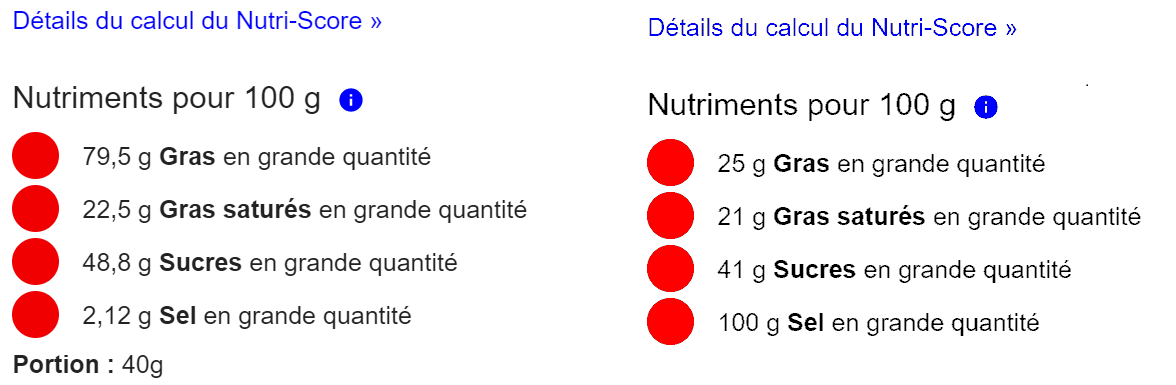

In [24]:
# Donc on peut les attribuer le score egal à 4
df2.loc['8004708012930','nova_group']=4
df2.loc['4011800530327','nova_group']=4
tabl = df2.groupby(by='nutrition-score-fr_100g')['nova_group'].agg('mean')

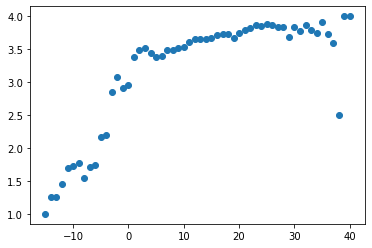

In [25]:
# La relation graphique 
plt.scatter(tabl.index,tabl.values)
plt.savefig('pict3.png')

In [26]:
# Recuperation des index
tabl.index

Float64Index([-15.0, -14.0, -13.0, -12.0, -11.0, -10.0,  -9.0,  -8.0,  -7.0,
               -6.0,  -5.0,  -4.0,  -3.0,  -2.0,  -1.0,   0.0,   1.0,   2.0,
                3.0,   4.0,   5.0,   6.0,   7.0,   8.0,   9.0,  10.0,  11.0,
               12.0,  13.0,  14.0,  15.0,  16.0,  17.0,  18.0,  19.0,  20.0,
               21.0,  22.0,  23.0,  24.0,  25.0,  26.0,  27.0,  28.0,  29.0,
               30.0,  31.0,  32.0,  33.0,  34.0,  35.0,  36.0,  37.0,  38.0,
               39.0,  40.0],
             dtype='float64', name='nutrition-score-fr_100g')

In [27]:
# Récupération des valeurs
tabl.values

array([1.        , 1.26315789, 1.25384615, 1.46039604, 1.6993007 ,
       1.73032258, 1.77025739, 1.54221388, 1.71200781, 1.74503841,
       2.17269128, 2.1919286 , 2.85318925, 3.07259295, 2.90768466,
       2.9625034 , 3.37650915, 3.48109222, 3.51380532, 3.43478261,
       3.38723006, 3.39110825, 3.48719091, 3.48511459, 3.51616951,
       3.52946846, 3.60727735, 3.65401641, 3.65181058, 3.65543684,
       3.6712226 , 3.71066847, 3.72748815, 3.73428594, 3.6723503 ,
       3.74013569, 3.79724094, 3.82690548, 3.86040641, 3.85517647,
       3.87930786, 3.86586713, 3.83644047, 3.84232082, 3.68695652,
       3.83508772, 3.77235772, 3.86206897, 3.78846154, 3.74285714,
       3.92      , 3.73333333, 3.6       , 2.5       , 4.        ,
       4.        ])

In [28]:
# Définition de la fonction d'affectation
def rempl(line):
    
    if math.isnan(line['nova_group']):
        a1=line['nutrition-score-fr_100g']
        
        loc =tabl.index.get_loc(a1)
        
        new_nova_valeur = np.round(tabl.values[loc])
       
    else:
        new_nova_valeur = line['nova_group']
    return  new_nova_valeur    

In [29]:
df2['nova_group'] = df2.apply(lambda x: rempl(x),axis=1)

In [30]:
df2['nova_group'].value_counts()

4.0    413592
3.0    191706
1.0     50750
2.0     19539
Name: nova_group, dtype: int64

In [31]:
# Verif NaN 
df2['nova_group'].isna().sum()

0

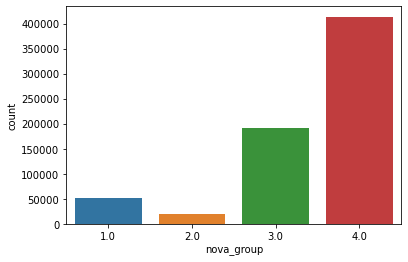

In [32]:
plt.figure()
sns.countplot(x='nova_group', data = df2)
plt.savefig('pict2.png')

In [33]:
# taux de valeurs manquantes en %
df3 = df2.copy()
taux_rempli = (df3.isna().sum()/df3.shape[0]).sort_values()
taux_rempli

url                                        0.000000
states_en                                  0.000000
states_tags                                0.000000
states                                     0.000000
pnns_groups_2                              0.000000
nova_group                                 0.000000
nutrition-score-fr_100g                    0.000000
created_datetime                           0.000000
last_modified_t                            0.000000
last_modified_datetime                     0.000000
created_t                                  0.000000
creator                                    0.000001
main_category                              0.000003
main_category_en                           0.000003
categories                                 0.000003
categories_tags                            0.000003
categories_en                              0.000003
nutriscore_grade                           0.000006
pnns_groups_1                              0.000925
countries   

In [34]:
# Suppression  les colonnes contenant ['_en', '_tags','_url','_t']
col_terminaison = ['_en', '_tags','_url','_t']

for col in df3.columns:
    for fin in col_terminaison:
        if col.endswith(fin):
            df3.drop(columns=col, inplace=True)
            break

In [35]:
# Détermination des lignes doublons 
indexes= df3.index
dublons = indexes[indexes.duplicated()]
dublons

Index(['30383354190402', '3560070278831'], dtype='object', name='code')

In [36]:
df3.loc[['30383354190402','3560070278831']]

,url,creator,created_datetime,last_modified_datetime,product_name,generic_name,quantity,packaging,brands,categories,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
code,,,,,,,,,,,,,,,,,,,,,
30383354190402,http://world-en.openfoodfacts.org/product/3038...,openfoodfacts-contributors,2020-12-15 12:35:56+00:00,2021-01-15 09:21:20+00:00,basilic,NaN,210 g,verre,panzani,"Epicerie,Sauces,Sauces tomate",...,2.2,1.7,0.99,0.396,NaN,NaN,NaN,NaN,NaN,2.0
30383354190402,http://world-en.openfoodfacts.org/product/3038...,openfoodfacts-contributors,2020-12-15 12:35:56+00:00,2021-01-15 09:23:03+00:00,basilic,NaN,210 g,verre,panzani,"Epicerie, Sauces, Sauces tomate",...,2.2,1.7,0.99,0.396,NaN,NaN,NaN,NaN,NaN,-3.0
3560070278831,http://world-en.openfoodfacts.org/product/3560...,openfoodfacts-contributors,2013-10-06 15:06:23+00:00,2021-04-17 07:44:17+00:00,"Pamplemousse rose, 100 % Pur Fruit Pressé","Jus de pamplemousse rose - Pamplemousse Rose, ...",1 L e,"Bouteille,Bouchon,Plastique","Carrefour,CMI (Carrefour Marchandises Internat...","en:plant-based-foods-and-beverages,en:beverage...",...,NaN,0.0,0.00,0.000,NaN,0.02,NaN,NaN,NaN,2.0
3560070278831,http://world-en.openfoodfacts.org/product/3560...,openfoodfacts-contributors,2013-10-06 15:06:23+00:00,2021-05-21 06:06:39+00:00,"Pamplemousse rose, 100 % Pur Fruit Pressé","Jus de pamplemousse rose - Pamplemousse Rose, ...",1 L e,"Bouteille,Bouchon,Plastique","Carrefour,CMI (Carrefour Marchandises Internat...","en:plant-based-foods-and-beverages,en:beverage...",...,NaN,0.0,0.00,0.000,NaN,0.02,NaN,NaN,NaN,2.0


#### produit N1 [30383354190402](http://world-en.openfoodfacts.org/product/30383354190402/basilic-panzani)
#### produit N2 [30383354190402](http://world-en.openfoodfacts.org/product/30383354190402/basilic-panzani)

In [37]:
# Suppression d'une ligne sur chaque index en gardant la plus ancienne 
doubl_line=(df3.sort_values(['last_modified_datetime'], ascending = False))

In [38]:
df3=doubl_line[~doubl_line.index.duplicated(keep='first')]

In [39]:
# Vérification des résultats : 
print('Verification: ',f'{df3.index[df3.index.duplicated()].size}')

Verification:  0


In [40]:
# La taille du dataset en ce moment
df3.shape

(675585, 52)

In [41]:
# Une autre valeur tres importante 
palm_oil=[p_oil for p_oil in df1.columns if 'palm' in p_oil]
palm_oil

['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']

In [42]:
# Comparaison 
df3[['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']].sample(5)

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
code,,
7290000531922,0.0,0.0
0292451089677,NaN,NaN
8423621002260,NaN,NaN
0016000413603,0.0,0.0
80425380,0.0,0.0


In [43]:
# Détermination des valeurs manquant sur chaque de colonne 
print('palm_oil:', df3['ingredients_from_palm_oil_n'].isna().sum())
print('may_be_from_palm_oil:', df3['ingredients_that_may_be_from_palm_oil_n'].isna().sum())

palm_oil: 194463
may_be_from_palm_oil: 194463


In [44]:
# Les valeurs obtenu 
df3['ingredients_from_palm_oil_n'].value_counts()

0.0    471796
1.0      9198
2.0       128
Name: ingredients_from_palm_oil_n, dtype: int64

In [45]:
# Les valeurs obtenu 
df3['ingredients_that_may_be_from_palm_oil_n'].value_counts()

0.0    452151
1.0     24633
2.0      3456
3.0       710
4.0       159
5.0        12
6.0         1
Name: ingredients_that_may_be_from_palm_oil_n, dtype: int64

In [46]:
# C'est assez étrange la répartition. La valeur de 2 correspond à 5 valeurs de l'autre côté 
df3[df3['ingredients_from_palm_oil_n'] == 2.0]['ingredients_that_may_be_from_palm_oil_n'].value_counts()


0.0    91
1.0    23
2.0    12
3.0     1
4.0     1
Name: ingredients_that_may_be_from_palm_oil_n, dtype: int64

In [47]:
# Nous allons garder ce qui est plus informatif dans notre ensemble de données
df3.drop(columns='ingredients_from_palm_oil_n', inplace=True)

In [48]:
# vérification et comparaison des features
# df3[['categories','pnns_groups_1','main_category','ingredients_text']]
for col in df3[['categories','pnns_groups_1','main_category','ingredients_text']]:
    print(f'{col :-<50}, {df3[col].unique()}')

categories----------------------------------------, ['en:ice-creams'
 'Plantaardige levensmiddelen en dranken, Dranken, Plantaardige levensmiddelen, Voedsel op basis van fruit en groenten, Fruit en afgeleide producten, Plantaardige dranken, Vruchtendranken, Fruit, Sappen en Nectars, Vruchtensappen, Alcoholvrije dranken, Multi-vruchtensappen'
 'Snacks' ...
 'Boissons, Boissons gazeuses, Boissons édulcorées, Boisson gazeuse light aux fruits'
 'Snacks, Snacks sucrés, Chocolats, Chocolats noirs, Chocolats pur beurre de cacao'
 'Produits laitiers, Produits fermentés, Produits laitiers fermentés, Fromages, Fromages de vache, Fromages à pâte pressée non cuite, Fromage à pâte dure']
pnns_groups_1-------------------------------------, ['Milk and dairy products' 'Beverages' 'unknown' 'Cereals and potatoes'
 'Sugary snacks' 'Fish Meat Eggs' 'Composite foods'
 'Fruits and vegetables' 'Fat and sauces' 'Salty snacks' nan
 'sugary-snacks' 'fruits-and-vegetables' 'cereals-and-potatoes'
 'salty-snacks'

#### Sur ces 4 features on va garder que la colonne "categorie", pour distinguer des boissons et des nourritures solid
* pratiquement tout les composants de "ingredients_text" sont renseigné dans les colonnes "sucre", "sel", "graisse", ...
* les colonnes "main_category" et "pnns_groups_1 ou 2 " contiennent les mêmes informations que la colonne "categories"

In [49]:
# Suppression des colonnes 
df3.drop(columns=['main_category', 'pnns_groups_1', 'pnns_groups_2','ingredients_text'], inplace=True)

In [50]:
df3.categories.isna().sum()

2

In [51]:
df3 = df3[df3.categories.notna()]

In [52]:
# Séparation des boissons/nourriture
df_boisson=df3[df3.categories.str.lower().str.contains('boissons')]
df_food =df3[~df3.categories.str.lower().str.contains('boissons')]

In [53]:
# Quantité de chaque groupe de produits
print(f"Taille échantillon boisson : {df_boisson.shape}")
print(f"Taille échantillon nourriture solide : {df_food.shape}")

Taille échantillon boisson : (91212, 47)
Taille échantillon nourriture solide : (584371, 47)


In [54]:
# La fonction d'affetation
def affect_cat(row):

    if 'boissons' in row['categories'].lower():
        
        return 1  
    else:
        return 0

In [55]:
# Affectation 1 pour les nourritures solid, et 0  - pour les boissons
df3['categories']=(df3.apply(lambda x:affect_cat(x),axis=1))


In [56]:
df3['categories'].value_counts()

0    584371
1     91212
Name: categories, dtype: int64

In [57]:
# produits fabriqués  en France
prod_FR = df3.countries.str.contains('FR')
prod_fr = df3.countries.str.lower().str.contains('fran')
df4 =  df3[prod_FR|prod_fr]
df4.shape

(266150, 47)

In [58]:
# La taille du dataset en ce moment
print("Quantité de colonnes en totalité ",df4.shape)
print("\n")
for i in df4:
    print(f'{i :-<25}, {df4[i].isna().sum()}')

Quantité de colonnes en totalité  (266150, 47)


url----------------------, 0
creator------------------, 0
created_datetime---------, 0
last_modified_datetime---, 0
product_name-------------, 890
generic_name-------------, 204105
quantity-----------------, 109197
packaging----------------, 141506
brands-------------------, 44902
categories---------------, 0
manufacturing_places-----, 210833
labels-------------------, 137673
emb_codes----------------, 209570
purchase_places----------, 190663
stores-------------------, 165976
countries----------------, 0
allergens----------------, 194354
traces-------------------, 213896
serving_size-------------, 195254
serving_quantity---------, 198829
additives_n--------------, 98781
ingredients_that_may_be_from_palm_oil_n, 98781
nutriscore_grade---------, 3
nova_group---------------, 0
states-------------------, 0
brand_owner--------------, 262446
ecoscore_score_fr--------, 78574
ecoscore_grade_fr--------, 78574
energy-kj_100g-----------, 203625
ener

### Pour info
#### 1 calorie vaut 180/43 soit 4.1860465116 Joules que nous arrondirons à 4,186 Joules.1000 calories = 1 Kilocalorie = 1 kcal

In [59]:
df4[['energy_100g','energy-kcal_100g','energy-kj_100g']].sample(5)

,energy_100g,energy-kcal_100g,energy-kj_100g
code,,,
3564700004838,219.0,NaN,219.0
3608419150629,1623.0,388.0,NaN
3250390626992,490.0,117.0,NaN
8410131000916,406.0,97.0,NaN
5287000663014,2092.0,500.0,NaN


In [60]:
# Passage et recuperation entre ces 3 colonnes. Le but de garder une de ces colonnes.
for energie in df4.index:
    if math.isnan(df4.loc[energie,'energy_100g']):
        if math.isnan(df4.loc[energie,'energy-kcal_100g']):
            break
        else:
            df4.loc[energie,'energy_100g'] = df4.loc[energie,'energy-kcal_100g']*4.186
            
print("Nombre des valeurs restantes", df4['energy_100g'].isna().sum()) 

Nombre des valeurs restantes 509


In [61]:
# Suppresion apres la récupération  
df4.drop(columns='energy-kcal_100g', inplace=True)


In [62]:
# les colonnes  energie_kj  non vides
col_kj_energie = df4[df4['energy-kj_100g'].notna()]


# les colonne energie vides
col_nan_energie = df4[df4['energy_100g'].isna()]

# union de indicateurs,pour trouver les doublons 
compar_energie =(col_nan_energie.index).union(col_kj_energie.index)


In [63]:
# On cherche les doublons 

doupl = compar_energie.duplicated()
if doupl.sum() == 0:
    print("Il n'y a pas de doublons")
else:
    for i in compar_energie[doupl]:
        df4.loc[i,'energy_100g'] = df4.loc[i, 'energy-kj_100g']
        print("on a recuperé {0} valeurs".fotmat(len(df4[i,'energy_100g'])))

Il n'y a pas de doublons


In [64]:
# Suppresion de la colonne energie kj
df4.drop(columns='energy-kj_100g', inplace=True)


In [65]:
df5=df4.copy()

In [66]:
# Observons la colonne "quantity"
df5['quantity'].sample(10)

code
3770004468003      1,5 l
3433877510315    487,5 g
3564707084895      564 g
8003740050306      500 g
3263859847517      300 g
3760010230374      350 g
3038354596402     1000 g
3596710388301        NaN
3580281781050      180 g
3426317722058        NaN
Name: quantity, dtype: object

In [67]:
# Pour eviter de supprimer les lignes d'un produit qui a plusieurs tailles,on va les coder autrement

poids =[]

for pair in range(df5['quantity'].shape[0]):
    poids.append(str(df5['quantity'][pair]).split(' ')[0])  # Recupearation de le chiffre  pour le codage
    
df5.insert(column='quantity_poids', value=poids,loc=len(df5.columns)) # insertion de nouvel colonne 

df5[['quantity','quantity_poids']].sample(10)  # affichage de résultat 

,quantity,quantity_poids
code,,
3560070910632,250 g,250
3442310000016,1 L,1
3337040002624,250 g,250
3324440502144,NaN,nan
3038356805045,500 g,500
3256226398309,"3 boîtes de 1/10, 234 g",3
3217690014133,NaN,nan
5038862306508,750 ml,750
5000168124858,600g,600g


In [68]:
# Attribution du code pour chaque ligne
df5['quantity_poids_code'] = df5['quantity_poids'].astype('category').cat.codes
df5[['quantity','quantity_poids','quantity_poids_code' ]].sort_values(by='quantity_poids').sample(5)

,quantity,quantity_poids,quantity_poids_code
code,,,
3266140054274,NaN,nan,4464
3700910200862,NaN,nan,4464
7610700006726,50 g,50,3378
3483190010856,180 g,180,1668
8003938005941,2 * 80 g (160 g),2,1793


In [69]:
dubl_quantuty=df5[['quantity','quantity_poids','quantity_poids_code','product_name']]\
[df5[['quantity','quantity_poids','quantity_poids_code','product_name']].duplicated()]
dubl_quantuty

,quantity,quantity_poids,quantity_poids_code,product_name
code,,,,
20087487,100 g,100,1109,Jambon Serrano
8411037800037,NaN,nan,4464,NaN
8003100865755,NaN,nan,4464,Pomodori pelati
8017477090108,NaN,nan,4464,Pomodori pelati
8009995000028,NaN,nan,4464,Pomodori pelati italiani
...,...,...,...,...
8480017348234,1 L,1,803,Huile de colza
8480017344939,1 kg,1,803,Riz long grain incollable
8426920234240,185 g,185,1689,Thon au naturel


In [70]:
# Ik y a 47447 lignes doublons ( par example)
df5.loc[['8003100865755', '8017477090108']]

,url,creator,created_datetime,last_modified_datetime,product_name,generic_name,quantity,packaging,brands,categories,...,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,quantity_poids,quantity_poids_code
code,,,,,,,,,,,,,,,,,,,,,
8003100865755,http://world-en.openfoodfacts.org/product/8003...,kiliweb,2019-03-18 18:18:41+00:00,2021-06-12 11:36:04+00:00,Pomodori pelati,NaN,NaN,NaN,NaN,0,...,0.02,0.008,NaN,NaN,NaN,NaN,NaN,-5.0,nan,4464
8017477090108,http://world-en.openfoodfacts.org/product/8017...,kiliweb,2018-06-25 12:21:39+00:00,2021-06-12 11:36:04+00:00,Pomodori pelati,NaN,NaN,NaN,NaN,0,...,0.10,0.040,NaN,NaN,NaN,NaN,NaN,-5.0,nan,4464


In [71]:
# Trier par date
doubl_line_poid = df5.sort_values(by='last_modified_datetime', ascending = False)

In [72]:
# Suppression des doublons 
df5 = doubl_line_poid[~doubl_line_poid[['quantity','quantity_poids','quantity_poids_code','product_name']].duplicated(keep='first')]

<AxesSubplot:>

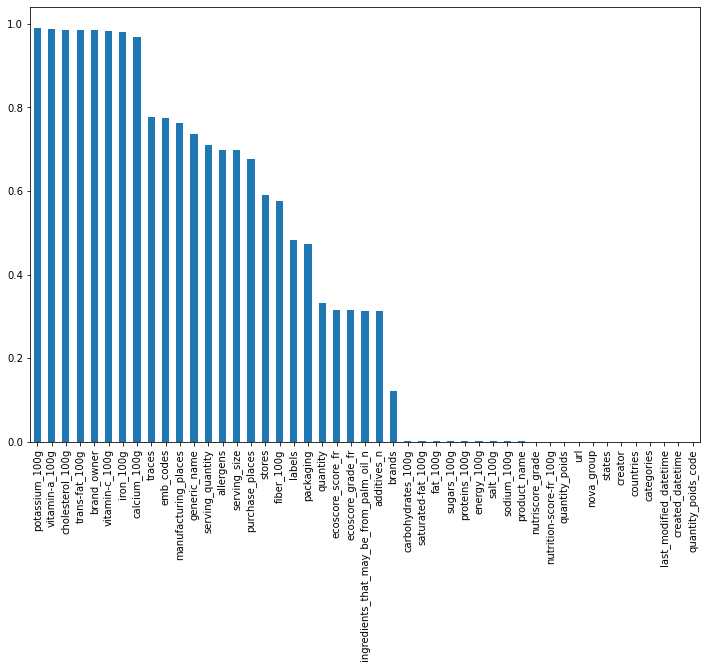

In [73]:
# Représentation graphique sur les manquants 
plt.figure(figsize=(12,8))
(df5.isna().sum()/df5.shape[0]).sort_values(ascending=False).plot.bar()

In [74]:
# Creation du data set numerique
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df5_num = df5.select_dtypes(numerics)

In [75]:
(df5_num.isna().sum()/df5_num.shape[0]).sort_values()

categories                                 0.000000
nutrition-score-fr_100g                    0.000000
nova_group                                 0.000000
quantity_poids_code                        0.000000
sodium_100g                                0.001559
salt_100g                                  0.001559
energy_100g                                0.002012
proteins_100g                              0.002016
sugars_100g                                0.002030
fat_100g                                   0.002035
saturated-fat_100g                         0.002044
carbohydrates_100g                         0.002465
ingredients_that_may_be_from_palm_oil_n    0.313256
additives_n                                0.313256
ecoscore_score_fr                          0.315647
fiber_100g                                 0.575447
serving_quantity                           0.710914
calcium_100g                               0.968816
iron_100g                                  0.980636
vitamin-c_10

In [76]:
# Nettoyage du dataset a partir de 60%
df5_num = df5_num[df5_num.columns[(df5_num.isna().sum()/df5_num.shape[0])<0.6]]

In [77]:
df5_num.isna().sum()

categories                                      0
additives_n                                 68510
ingredients_that_may_be_from_palm_oil_n     68510
nova_group                                      0
ecoscore_score_fr                           69033
energy_100g                                   440
fat_100g                                      445
saturated-fat_100g                            447
carbohydrates_100g                            539
sugars_100g                                   444
fiber_100g                                 125852
proteins_100g                                 441
salt_100g                                     341
sodium_100g                                   341
nutrition-score-fr_100g                         0
quantity_poids_code                             0
dtype: int64

In [78]:
# C'est la valeur "énergie 100g" qui varie trop 
df5_num.var().sort_values()

ingredients_that_may_be_from_palm_oil_n    1.796180e-01
categories                                 2.087181e-01
nova_group                                 6.989188e-01
additives_n                                5.859482e+00
fiber_100g                                 1.929261e+01
sodium_100g                                2.809800e+01
saturated-fat_100g                         7.101579e+01
proteins_100g                              7.520973e+01
nutrition-score-fr_100g                    7.836700e+01
salt_100g                                  1.755420e+02
fat_100g                                   3.227430e+02
sugars_100g                                3.528611e+02
ecoscore_score_fr                          6.907616e+02
carbohydrates_100g                         7.199555e+02
quantity_poids_code                        1.625112e+06
energy_100g                                6.138720e+06
dtype: float64

In [79]:
# Creation du data set 'object'
df5_obj = df5.select_dtypes('object')

In [80]:
df5_obj.isna().sum()

url                          0
creator                      0
product_name               278
generic_name            160887
quantity                 72561
packaging               103440
brands                   26883
manufacturing_places    167009
labels                  105477
emb_codes               169244
purchase_places         148030
stores                  128925
countries                    0
allergens               152568
traces                  169912
serving_size            152476
nutriscore_grade             2
states                       0
brand_owner             215228
ecoscore_grade_fr        69033
quantity_poids               0
dtype: int64

In [81]:
# On va les utiliser 
colonne_obj_outil  = ['product_name','ecoscore_grade_fr','nutriscore_grade','quantity_poids']

In [82]:
df5_obj = df5_obj[colonne_obj_outil]

## Analyse descriptive

### Analyse univarié 

In [83]:
df_analyse_num = df5_num.copy() # sauvegarde 
df_analyse_num.shape

(218703, 16)

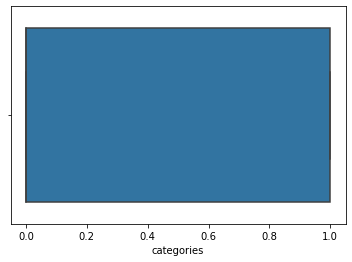

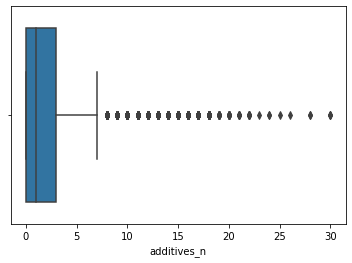

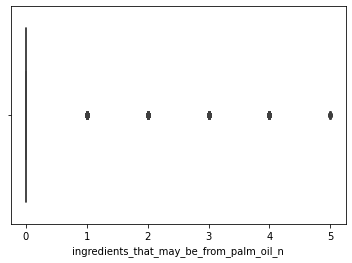

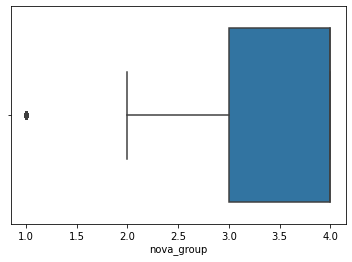

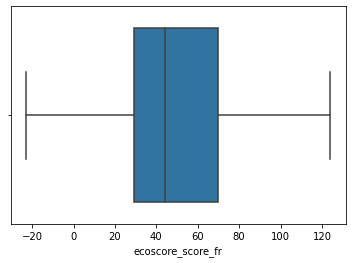

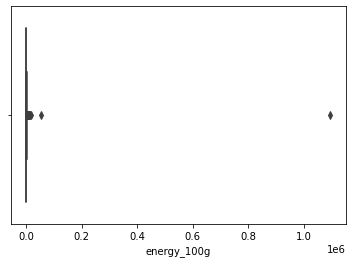

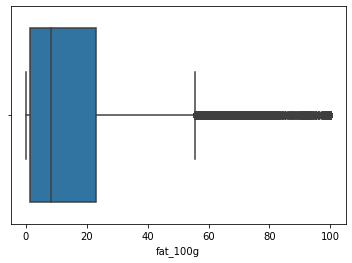

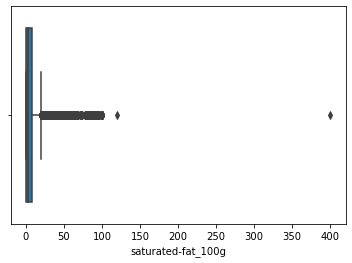

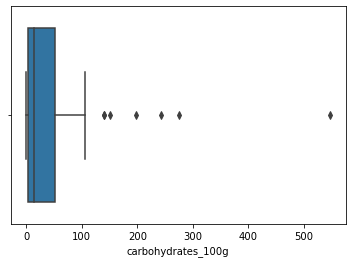

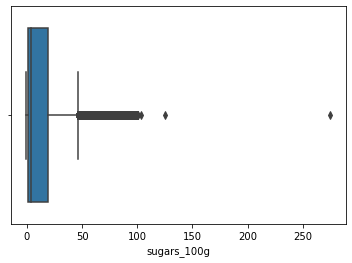

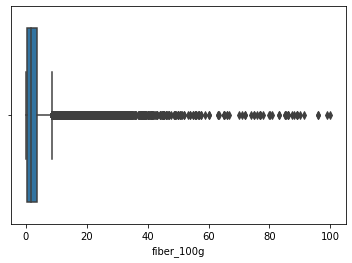

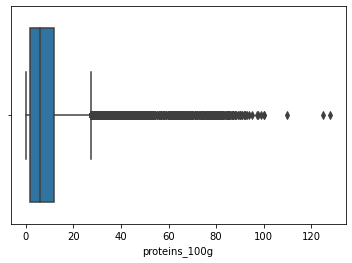

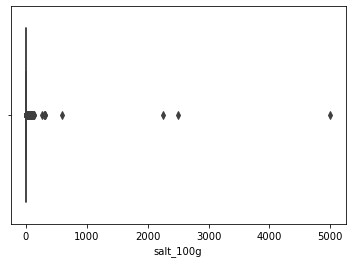

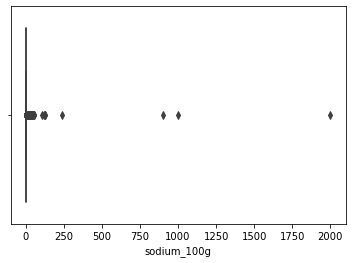

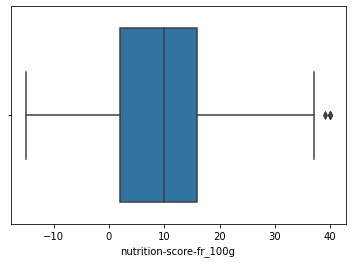

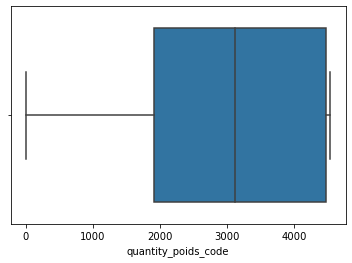

In [84]:
for rempl in df_analyse_num.columns:
    plt.figure()
    sns.boxplot(df_analyse_num[rempl])

In [85]:
df_analyse_num.reset_index(inplace=True) # reset d'index

####  Energy_100g

In [86]:
# Calculs à nouveau de l'écart-type et du coefficient de variation
coef_var_energie = st.variation(df_analyse_num['energy_100g'].values)
std_energie = df_analyse_num['energy_100g'].std()
mean_energie = df_analyse_num['energy_100g'].mean()
mediane_energie = df_analyse_num['energy_100g'].median()
solid = pd.DataFrame([mean_energie, mediane_energie,std_energie,coef_var_energie],\
                     index=['Mean','Mediane','Std','Coef var'], columns=['Solid'])
print("------------------------------------------------------------------------------- ")
print(solid,'\n')
print("------------------------------------------------------------------------------- ")


------------------------------------------------------------------------------- 
                Solid
Mean      1159.434445
Mediane   1054.000000
Std       2477.644118
Coef var          NaN 

------------------------------------------------------------------------------- 


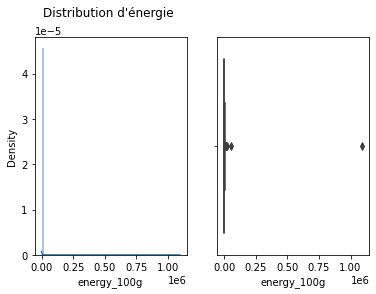

In [87]:
plt.figure()
plt.subplot(121)
plt.title('Distribution d\'énergie \n');
sns.distplot(df_analyse_num['energy_100g']);
plt.subplot(122)
sns.boxplot(df_analyse_num['energy_100g']);

In [88]:
df_analyse_num.describe()['energy_100g']

count    2.182630e+05
mean     1.159434e+03
std      2.477644e+03
min      0.000000e+00
25%      4.720000e+02
50%      1.054000e+03
75%      1.682000e+03
max      1.094259e+06
Name: energy_100g, dtype: float64

In [89]:
# Determinatio des outliners

limit_moustache_droite = df_analyse_num['energy_100g'].quantile(0.75)+1.5*(df_analyse_num['energy_100g'].quantile(0.75)-\
                                                                df_analyse_num['energy_100g'].quantile(0.25))
limit_moustache_droite

3497.0

In [90]:
# La somme de médiane et écart type 
mediane_std = df_analyse_num['energy_100g'].median() + df_analyse_num['energy_100g'].std()
mediane_std

3531.6441181034074

In [91]:
# Comparaison

def maximum(a, b):
      
    if a >= b:
        return a
    else:
        return b
limite  = maximum(limit_moustache_droite,mediane_std )

In [92]:
df_analyse_num = df_analyse_num[df_analyse_num['energy_100g']<limite]

In [93]:
print(df_analyse_num[['energy_100g','nutrition-score-fr_100g','quantity_poids_code']].\
sort_values(by='energy_100g', ascending=False).sample(5))
df_analyse_num[['energy_100g','nutrition-score-fr_100g','quantity_poids_code']].drop_duplicates(inplace=True)

        energy_100g  nutrition-score-fr_100g  quantity_poids_code
150512        653.0                     13.0                 4464
7330         1536.0                     -6.0                 2987
27257        3464.0                     10.0                 4464
76473        1565.0                     11.0                 4464
20231         197.0                     -1.0                 4464


In [94]:
# Valeurs vide
print(df_analyse_num.shape)
df_analyse_num['energy_100g'].isna().sum()

(216218, 17)


0

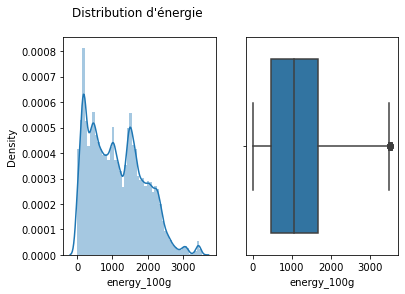

In [95]:
# Le résultat obtenu 
plt.figure()
plt.subplot(121)
plt.title('Distribution d\'énergie \n')
sns.distplot(df_analyse_num['energy_100g'])
plt.subplot(122)
sns.boxplot(df_analyse_num['energy_100g'])
plt.savefig('pict1.png')

### Sucre

In [96]:
# Calculs à nouveau de l'écart-type et du coefficient de variation
coef_var_sucre = st.variation(df_analyse_num['sugars_100g'].values)
std_sucre = df_analyse_num['sugars_100g'].std()
mean_sucre = df_analyse_num['sugars_100g'].mean()
mediane_sucre = df_analyse_num['sugars_100g'].median()
solid = pd.DataFrame([mean_sucre, mediane_sucre,std_sucre,coef_var_sucre],\
                     index=['Mean','Mediane','Std','Coef var'], columns=['Solid'])
print("------------------------------------------------------------------------------- ")
print(solid,'\n')
print("------------------------------------------------------------------------------- ")

------------------------------------------------------------------------------- 
              Solid
Mean      13.415652
Mediane    4.000000
Std       18.811486
Coef var        NaN 

------------------------------------------------------------------------------- 


<AxesSubplot:xlabel='sugars_100g'>

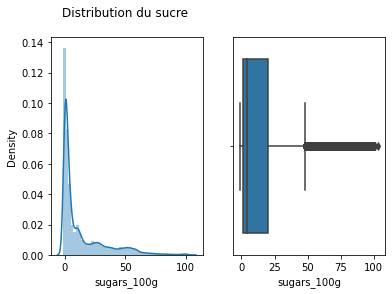

In [97]:
plt.figure()
plt.subplot(121)
plt.title('Distribution du sucre \n')
sns.distplot(df_analyse_num['sugars_100g'])
plt.subplot(122)
sns.boxplot(df_analyse_num['sugars_100g'])

In [98]:
# Determinatio des outliners

limit_moustache_droite = df_analyse_num['sugars_100g'].quantile(0.75)+1.5*(df_analyse_num['sugars_100g'].quantile(0.75)-\
                                                                df_analyse_num['sugars_100g'].quantile(0.25))
limit_moustache_droite

47.900000000000006

In [99]:
# La somme de médiane et écart type 
mediane_std = df_analyse_num['sugars_100g'].median() + df_analyse_num['sugars_100g'].std()
mediane_std

22.811486483895465

In [100]:
# Comparaison

limite  = maximum(limit_moustache_droite,mediane_std )

In [101]:
df_analyse_num = df_analyse_num[df_analyse_num['sugars_100g']<limite]


In [102]:
print(df_analyse_num[['sugars_100g','nutrition-score-fr_100g','quantity_poids_code']].\
sort_values(by='sugars_100g', ascending=False).sample(5))
df_analyse_num[['sugars_100g','nutrition-score-fr_100g','quantity_poids_code']].drop_duplicates(inplace=True)

        sugars_100g  nutrition-score-fr_100g  quantity_poids_code
79862           4.0                      8.0                 1920
213351          4.0                      2.0                 1317
130250          0.0                     16.0                 4464
168422          0.9                     -1.0                 3481
211380         10.0                     13.0                 4464


In [103]:
# Valeurs vide
print(df_analyse_num.shape)
df_analyse_num['sugars_100g'].isna().sum()


(197640, 17)


0

<AxesSubplot:xlabel='sugars_100g'>

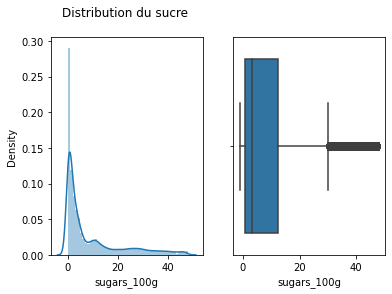

In [104]:
plt.figure()
plt.subplot(121)
plt.title('Distribution du sucre \n')
sns.distplot(df_analyse_num['sugars_100g'])
plt.subplot(122)
sns.boxplot(df_analyse_num['sugars_100g'])

### Saturated_fat

In [105]:
df_analyse_num_1 = df_analyse_num.copy()

In [106]:
# Calculs à nouveau de l'écart-type et du coefficient de variation
coef_var_sat_fat = st.variation(df_analyse_num_1['saturated-fat_100g'].values)
std_sat_fat = df_analyse_num_1['saturated-fat_100g'].std()
mean_sat_fat = df_analyse_num_1['saturated-fat_100g'].mean()
mediane_sat_fat = df_analyse_num_1['saturated-fat_100g'].median()
solid = pd.DataFrame([mean_sat_fat, mediane_sat_fat,std_sat_fat,coef_var_sat_fat],\
                     index=['Mean','Mediane','Std','Coef var'], columns=['Solid'])
print("------------------------------------------------------------------------------- ")
print(solid,'\n')
print("------------------------------------------------------------------------------- ")

------------------------------------------------------------------------------- 
             Solid
Mean      5.476328
Mediane   2.200000
Std       7.914159
Coef var       NaN 

------------------------------------------------------------------------------- 


<AxesSubplot:xlabel='saturated-fat_100g'>

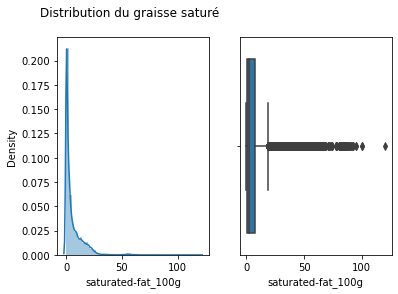

In [107]:
plt.figure()
plt.subplot(121)
plt.title('Distribution du graisse saturé  \n')
sns.distplot(df_analyse_num_1['saturated-fat_100g'])
plt.subplot(122)
sns.boxplot(df_analyse_num_1['saturated-fat_100g'])

In [108]:
# Determinatio des outliners

limit_moustache_droite = df_analyse_num_1['saturated-fat_100g'].quantile(0.75)+1.5*(df_analyse_num_1['saturated-fat_100g'].quantile(0.75)-\
                                                                df_analyse_num_1['saturated-fat_100g'].quantile(0.25))
limit_moustache_droite

18.9

In [109]:
# La somme de médiane et écart type 
mediane_std = df_analyse_num_1['saturated-fat_100g'].median() + df_analyse_num_1['saturated-fat_100g'].std()
mediane_std

10.114159259200889

In [110]:
# Comparaison

limite  = maximum(limit_moustache_droite,mediane_std )

In [111]:
df_analyse_num_1 = df_analyse_num_1[df_analyse_num_1['saturated-fat_100g']<limite]


In [112]:
print(df_analyse_num_1[['saturated-fat_100g','nutrition-score-fr_100g','quantity_poids_code']].\
sort_values(by='saturated-fat_100g', ascending=False).sample(5))
df_analyse_num_1[['saturated-fat_100g','nutrition-score-fr_100g','quantity_poids_code']].drop_duplicates(inplace=True)

        saturated-fat_100g  nutrition-score-fr_100g  quantity_poids_code
69225                  0.6                      4.0                 3392
112503                 5.3                      7.0                 2608
191565                 4.2                      4.0                 2993
179867                 1.5                     13.0                 1109
42299                  0.0                      3.0                 3378


In [113]:
# Valeurs vide
print(df_analyse_num_1.shape)
df_analyse_num_1['saturated-fat_100g'].isna().sum()

(183648, 17)


0

<AxesSubplot:xlabel='saturated-fat_100g'>

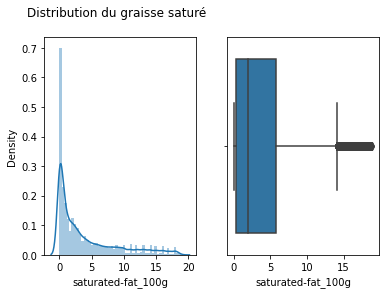

In [114]:
plt.figure()
plt.subplot(121)
plt.title('Distribution du graisse saturé  \n')
sns.distplot(df_analyse_num_1['saturated-fat_100g'])
plt.subplot(122)
sns.boxplot(df_analyse_num_1['saturated-fat_100g'])

### Sodium & Sel

### Pour info 
##### La teneur en sodium correspond à la teneur en sel mentionnée sur la déclaration obligatoire divisée par un coefficient de conversion de 2,5.

In [115]:
df_analyse_num_2 = df_analyse_num_1.copy()
df_analyse_num_2['convers_sodium_sel_solid']=df_analyse_num_2['salt_100g']/df_analyse_num_2['sodium_100g']
df_analyse_num_2[['salt_100g','sodium_100g','convers_sodium_sel_solid']].sample(5)

,salt_100g,sodium_100g,convers_sodium_sel_solid
173326,1.09,0.436,2.5
71986,0.46,0.184,2.5
209110,0.08,0.032,2.5
32689,0.00,0.000,NaN
85696,0.10,0.040,2.5


In [116]:
# Verification et recuperation des donnes
for verif_nan in df_analyse_num_2.index:
    if math.isnan(df_analyse_num_2.loc[verif_nan,'salt_100g']):
        if math.notnan(df_analyse_num_2.loc[verif_nan,'sodium_100g']):
            df_analyse_num_2['salt_100g'].apply(rempl(df_analyse_num_2.loc[verif_nan,'sodium_100g']))
        else:
            break
    else:
        if math.isnan(df_analyse_num_2.loc[verif_nan,'sodium_100g']):
            df_analyse_num_2['sodium_100g'].apply(rempl(df_analyse_num_2.loc[verif_nan,'salt_100g']))
        else:
            break
  

<AxesSubplot:xlabel='salt_100g'>

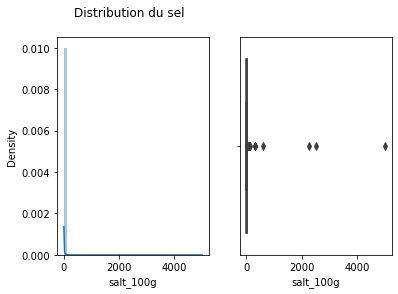

In [117]:
plt.figure()
plt.subplot(121)
plt.title('Distribution du sel  \n')
sns.distplot(df_analyse_num_2['salt_100g'])
plt.subplot(122)
sns.boxplot(df_analyse_num_2['salt_100g'])

In [118]:
# Determinatio des outliners

limit_moustache_droite = df_analyse_num_2['salt_100g'].quantile(0.75)+1.5*(df_analyse_num_2['salt_100g'].quantile(0.75)-\
                                                                df_analyse_num_2['salt_100g'].quantile(0.25))
limit_moustache_droite

3.0999999999999996

In [119]:
# La somme de médiane et écart type 
mediane_std = df_analyse_num_2['salt_100g'].median() + df_analyse_num_2['salt_100g'].std()
mediane_std

15.05738965937361

In [120]:
# Comparaison

limite  = maximum(limit_moustache_droite,mediane_std )

In [121]:
df_analyse_num_2 = df_analyse_num_2[df_analyse_num_2['salt_100g']<limite]

In [122]:
print(df_analyse_num_2[['salt_100g','nutrition-score-fr_100g','quantity_poids_code']].\
sort_values(by='salt_100g', ascending=False).sample(5))
df_analyse_num_2[['salt_100g','nutrition-score-fr_100g','quantity_poids_code']].drop_duplicates(inplace=True)

        salt_100g  nutrition-score-fr_100g  quantity_poids_code
71368        0.00                     -4.0                 1793
51378        0.15                     26.0                 2521
4287         0.15                     19.0                 4144
168984       1.90                     14.0                 1908
119262      10.70                     12.0                 1506


In [123]:
# Valeurs vide
print(df_analyse_num_2.shape)
df_analyse_num_2['salt_100g'].isna().sum()

(182933, 18)


0

<AxesSubplot:xlabel='salt_100g'>

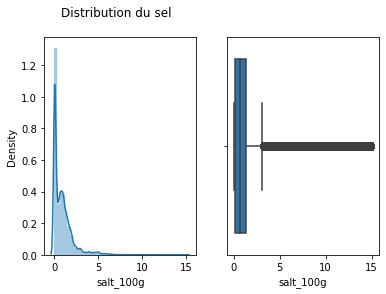

In [124]:
plt.figure()
plt.subplot(121)
plt.title('Distribution du sel  \n')
sns.distplot(df_analyse_num_2['salt_100g'])
plt.subplot(122)
sns.boxplot(df_analyse_num_2['salt_100g'])

In [125]:
df_analyse_num_2['sodium_100g']=df_analyse_num_2['salt_100g']/2.5 # attribution a la colonne sodium
df_analyse_num_2.drop(columns=['convers_sodium_sel_solid'],inplace=True) # suppresion de la colonne intermédiaire 

### Graisse 

In [126]:
df_analyse_num_3 = df_analyse_num_2.copy()

In [127]:
# Calculs à nouveau de l'écart-type et du coefficient de variation
coef_var_fat = st.variation(df_analyse_num_3['fat_100g'].values)
std_fat = df_analyse_num_3['fat_100g'].std()
mean_fat = df_analyse_num_3['fat_100g'].mean()
mediane_fat = df_analyse_num_3['fat_100g'].median()
solid = pd.DataFrame([mean_fat, mediane_fat,std_fat,coef_var_fat],\
                     index=['Mean','Mediane','Std','Coef var'], columns=['Solid'])
print("------------------------------------------------------------------------------- ")
print(solid,'\n')
print("------------------------------------------------------------------------------- ")

------------------------------------------------------------------------------- 
              Solid
Mean      12.217024
Mediane    7.200000
Std       14.790714
Coef var        NaN 

------------------------------------------------------------------------------- 


<AxesSubplot:xlabel='fat_100g'>

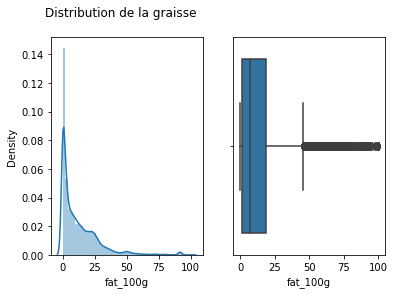

In [128]:
plt.figure()
plt.subplot(121)
plt.title('Distribution de la graisse   \n')
sns.distplot(df_analyse_num_3['fat_100g'])
plt.subplot(122)
sns.boxplot(df_analyse_num_3['fat_100g'])

In [129]:
# Determinatio des outliners

limit_moustache_droite = df_analyse_num_3['fat_100g'].quantile(0.75)+1.5*(df_analyse_num_3['fat_100g'].quantile(0.75)-\
                                                                df_analyse_num_3['fat_100g'].quantile(0.25))
limit_moustache_droite

45.15

In [130]:
# La somme de médiane et écart type 
mediane_std = df_analyse_num_3['fat_100g'].median() + df_analyse_num_3['fat_100g'].std()
mediane_std

21.9907136204933

In [131]:
# Comparaison

limite  = maximum(limit_moustache_droite,mediane_std )

In [132]:
df_analyse_num_3 = df_analyse_num_3[df_analyse_num_3['fat_100g']<limite]

In [133]:
print(df_analyse_num_3[['fat_100g','nutrition-score-fr_100g','quantity_poids_code']].\
sort_values(by='fat_100g', ascending=False).sample(5))
df_analyse_num_3[['fat_100g','nutrition-score-fr_100g','quantity_poids_code']].drop_duplicates(inplace=True)

        fat_100g  nutrition-score-fr_100g  quantity_poids_code
87646       20.0                     16.0                 4464
54378       36.0                     25.0                 4464
195783       0.5                      4.0                 4464
138447      15.0                     11.0                 4464
174164       8.7                     13.0                 2987


In [134]:
# Valeurs vide
print(df_analyse_num_3.shape)
df_analyse_num_3['fat_100g'].isna().sum()

(176021, 17)


0

<AxesSubplot:xlabel='fat_100g'>

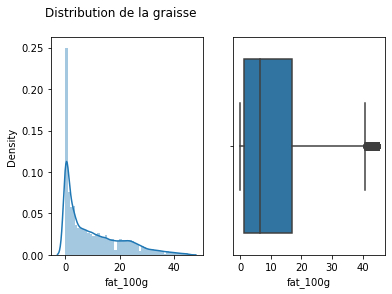

In [135]:
plt.figure()
plt.subplot(121)
plt.title('Distribution de la graisse   \n')
sns.distplot(df_analyse_num_3['fat_100g'])
plt.subplot(122)
sns.boxplot(df_analyse_num_3['fat_100g'])

In [136]:
# La taille du dataset en ce moment
df_analyse_num_3.isna().sum()

code                                           0
categories                                     0
additives_n                                54383
ingredients_that_may_be_from_palm_oil_n    54383
nova_group                                     0
ecoscore_score_fr                          57453
energy_100g                                    0
fat_100g                                       0
saturated-fat_100g                             0
carbohydrates_100g                            64
sugars_100g                                    0
fiber_100g                                 97674
proteins_100g                                  0
salt_100g                                      0
sodium_100g                                    0
nutrition-score-fr_100g                        0
quantity_poids_code                            0
dtype: int64

### Glucides

In [137]:
# Calculs à nouveau de l'écart-type et du coefficient de variation
coef_var_glucides = st.variation(df_analyse_num_3['carbohydrates_100g'].values)
std_glucides = df_analyse_num_3['carbohydrates_100g'].std()
mean_glucides = df_analyse_num_3['carbohydrates_100g'].mean()
mediane_glucides = df_analyse_num_3['carbohydrates_100g'].median()
solid = pd.DataFrame([mean_glucides, mediane_glucides,std_glucides,coef_var_glucides],\
                     index=['Mean','Mediane','Std','Coef var'], columns=['Solid'])
print("------------------------------------------------------------------------------- ")
print(solid,'\n')
print("------------------------------------------------------------------------------- ")

------------------------------------------------------------------------------- 
              Solid
Mean      23.891743
Mediane   12.600000
Std       24.807594
Coef var        NaN 

------------------------------------------------------------------------------- 


<AxesSubplot:xlabel='carbohydrates_100g'>

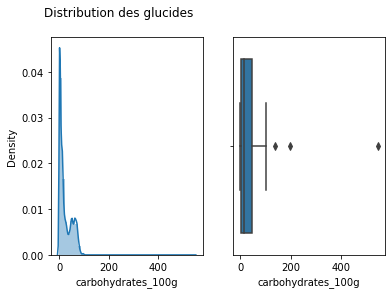

In [138]:
plt.figure()
plt.subplot(121)
plt.title('Distribution des glucides    \n')
sns.distplot(df_analyse_num_3['carbohydrates_100g'])
plt.subplot(122)
sns.boxplot(df_analyse_num_3['carbohydrates_100g'])

In [139]:
limit_moustache_droite = df_analyse_num_3['carbohydrates_100g'].quantile(0.75)+1.5*(df_analyse_num_3['carbohydrates_100g'].quantile(0.75)-\
                                                                df_analyse_num_3['carbohydrates_100g'].quantile(0.25))
limit_moustache_droite

107.3999998569489

In [140]:
# La somme de médiane et écart type 
mediane_std = df_analyse_num_3['carbohydrates_100g'].median() + df_analyse_num_3['carbohydrates_100g'].std()
mediane_std

37.4075941268436

In [141]:
# Comparaison

limite  = maximum(limit_moustache_droite,mediane_std )

In [142]:
df_analyse_num_3 = df_analyse_num_3[df_analyse_num_3['carbohydrates_100g']<limite]

In [143]:
print(df_analyse_num_3[['carbohydrates_100g','nutrition-score-fr_100g','quantity_poids_code']].\
sort_values(by='carbohydrates_100g', ascending=False).sample(5))
df_analyse_num_3[['carbohydrates_100g','nutrition-score-fr_100g','quantity_poids_code']].drop_duplicates(inplace=True)

        carbohydrates_100g  nutrition-score-fr_100g  quantity_poids_code
110694                11.9                      2.0                 1114
2331                  83.0                      3.0                 2528
175435                 9.0                     12.0                 3385
218546                 9.0                     12.0                 2614
101275                 8.7                     -2.0                 3260


In [144]:
# Valeurs vide
print(df_analyse_num_3.shape)
df_analyse_num_3['carbohydrates_100g'].isna().sum()

(175954, 17)


0

<AxesSubplot:xlabel='carbohydrates_100g'>

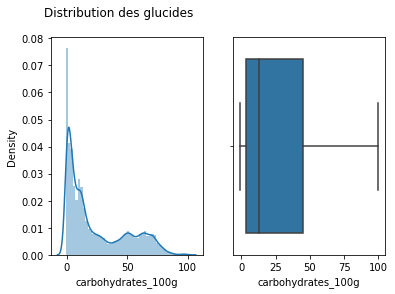

In [145]:
plt.figure()
plt.subplot(121)
plt.title('Distribution des glucides    \n')
sns.distplot(df_analyse_num_3['carbohydrates_100g'])
plt.subplot(122)
sns.boxplot(df_analyse_num_3['carbohydrates_100g'])

#### Analyse bivarié et multivariée 

In [146]:
df_analyse_num_4 = df_analyse_num_3.copy()

In [147]:
df_analyse_num_4 = df_analyse_num_4.set_index('code',drop=True)

#### Pour info

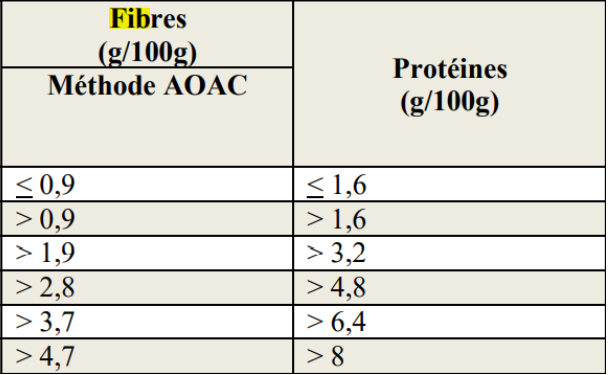

In [148]:
df_analyse_num_4.describe()[['fiber_100g','proteins_100g']]

,fiber_100g,proteins_100g
count,78304.000000,175954.000000
mean,2.803946,8.523229
std,4.357923,8.670490
min,0.000000,0.000000
25%,0.500000,2.300000
50%,1.700000,6.400000
75%,3.500000,12.000000
max,100.000000,100.000000


<AxesSubplot:xlabel='proteins_100g'>

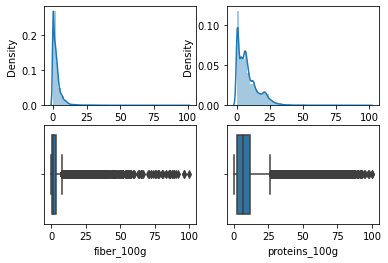

In [149]:
plt.figure()
plt.title('Distribution de fibre et proteine  \n')
plt.subplot(221)
sns.distplot(df_analyse_num_4['fiber_100g'])
plt.subplot(223)
sns.boxplot(df_analyse_num_4['fiber_100g'])
plt.subplot(222)
sns.distplot(df_analyse_num_4['proteins_100g'])
plt.subplot(224)
sns.boxplot(df_analyse_num_4['proteins_100g'])

In [150]:
# Remplissons les valeurs manquant par leur médiane 
df_analyse_num_4['fiber_100g'].fillna(df_analyse_num_4['fiber_100g'].median(), inplace=True)

In [151]:
# Suppression de 2% de donnes avec Isolation Forest
fiber_prot = df_analyse_num_4[['fiber_100g','proteins_100g']]

In [152]:
model_isolation_forest = IsolationForest(random_state=42, contamination=0.02)
model_isolation_forest.fit(fiber_prot)

IsolationForest(contamination=0.02, random_state=42)

In [153]:
outliers_forest = model_isolation_forest.predict(fiber_prot) ==-1
outliers_forest

array([False, False, False, ..., False, False, False])

In [154]:
fiber_prot[outliers_forest]

,fiber_100g,proteins_100g
code,,
4022381315203,1.7,40.80
3560070581870,14.0,11.00
03801002,11.1,26.67
3347430010351,33.7,21.20
0728633106394,1.7,84.00
...,...,...
5425008341057,11.9,3.10
3596710371549,17.4,19.10
3257982268981,0.0,32.00


In [155]:
fiber_prot[outliers_forest].index

Index(['4022381315203', '3560070581870', '03801002', '3347430010351',
       '0728633106394', '5999076217533', '8436037451430', '3583788442400',
       '7300400118101', '00189095',
       ...
       '7340084860132', '3450160004719', '3450160007000', '3347431053135',
       '3335121134011', '5425008341057', '3596710371549', '3257982268981',
       '3344290372803', '3272550000077'],
      dtype='object', name='code', length=3502)

In [156]:
df_analyse_num_4.drop(index=fiber_prot[outliers_forest].index,inplace=True)

In [157]:
df_analyse_num_4.describe()[['fiber_100g','proteins_100g']]

,fiber_100g,proteins_100g
count,172452.000000,172452.000000
mean,1.959577,8.024632
std,1.624785,7.299212
min,0.000000,0.000000
25%,1.700000,2.120000
50%,1.700000,6.200000
75%,1.700000,12.000000
max,12.500000,39.800000


<AxesSubplot:xlabel='proteins_100g'>

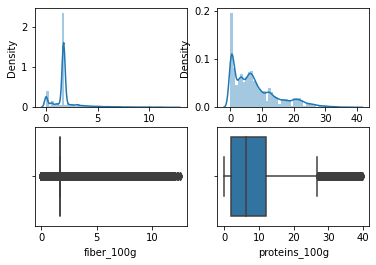

In [158]:
plt.figure()
plt.title('Distribution de fibre et proteine  \n')
plt.subplot(221)
sns.distplot(df_analyse_num_4['fiber_100g'])
plt.subplot(223)
sns.boxplot(df_analyse_num_4['fiber_100g'])
plt.subplot(222)
sns.distplot(df_analyse_num_4['proteins_100g'])
plt.subplot(224)
sns.boxplot(df_analyse_num_4['proteins_100g'])

In [159]:
df_analyse_num_4.isna().sum()

categories                                     0
additives_n                                53525
ingredients_that_may_be_from_palm_oil_n    53525
nova_group                                     0
ecoscore_score_fr                          55545
energy_100g                                    0
fat_100g                                       0
saturated-fat_100g                             0
carbohydrates_100g                             0
sugars_100g                                    0
fiber_100g                                     0
proteins_100g                                  0
salt_100g                                      0
sodium_100g                                    0
nutrition-score-fr_100g                        0
quantity_poids_code                            0
dtype: int64

### Ecoscore_score_fr & Ecoscore_grade_fr

#### Pour info

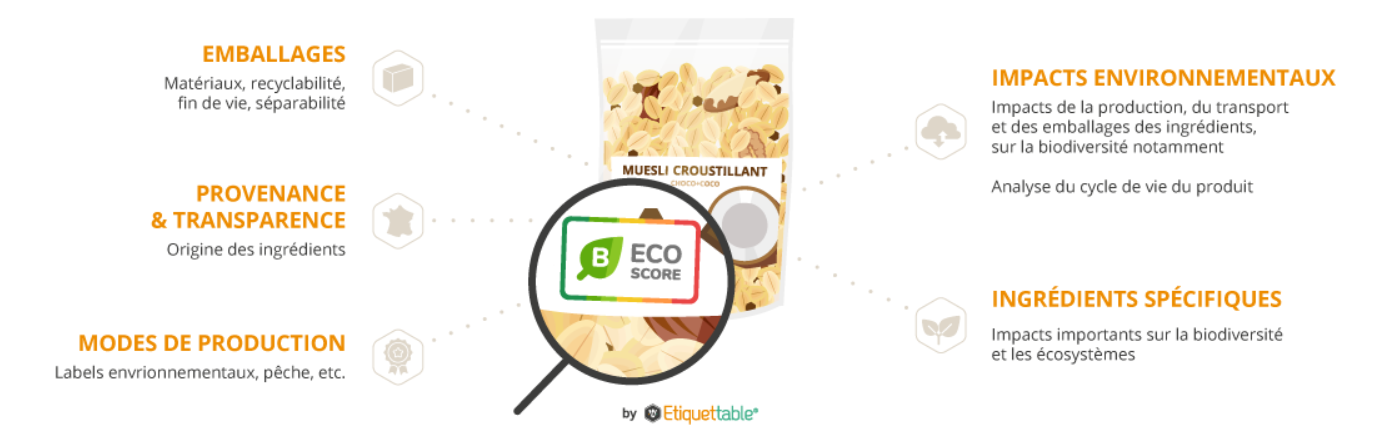

In [160]:
# On va réunir les valeurs qualitatives et quantatives
df_analyse_commune = df_analyse_num_4.merge(df5_obj, on ='code', how ='left')

In [161]:
# La taille du dataset
df_analyse_commune.shape

(172452, 20)

In [162]:
# Valeurs manquants 
df_analyse_commune.isna().sum()

categories                                     0
additives_n                                53525
ingredients_that_may_be_from_palm_oil_n    53525
nova_group                                     0
ecoscore_score_fr                          55545
energy_100g                                    0
fat_100g                                       0
saturated-fat_100g                             0
carbohydrates_100g                             0
sugars_100g                                    0
fiber_100g                                     0
proteins_100g                                  0
salt_100g                                      0
sodium_100g                                    0
nutrition-score-fr_100g                        0
quantity_poids_code                            0
product_name                                 215
ecoscore_grade_fr                          55545
nutriscore_grade                               1
quantity_poids                                 0
dtype: int64

In [163]:
# Determination du lien 
df_analyse_commune[['ecoscore_score_fr','ecoscore_grade_fr']].sort_values(by='ecoscore_score_fr', ascending = False).sample(10)

,ecoscore_score_fr,ecoscore_grade_fr
code,,
27054758,NaN,NaN
3492500059386,NaN,NaN
3258563470069,2.0,e
3700029206441,86.0,b
8712100569968,91.0,a
0063400040519,NaN,NaN
56001273,7.0,e
3289477020002,65.0,b
3760002250045,41.0,c


In [164]:
# L'étendue de la colonne 
print("min:", df_analyse_commune['ecoscore_score_fr'].min())
print("max:", df_analyse_commune['ecoscore_score_fr'].max())

min: -23.0
max: 124.0


In [165]:
# La valeur min  -> mal renseigner 
df_analyse_commune.groupby(by='ecoscore_grade_fr')['ecoscore_score_fr'].agg('mean')

ecoscore_grade_fr
a    92.246365
b    75.125431
c    48.483569
d    30.387552
e     8.798823
Name: ecoscore_score_fr, dtype: float64

In [166]:
# Attribution des scores
df_analyse_commune['ecoscore_score_fr'].fillna(0.0, inplace=True)
df_analyse_commune['ecoscore_grade_fr'].fillna('Pas d\'info',inplace=True)

### ingredients_from_palm_oil_n et nova

In [167]:
# Determination du lien 
df_analyse_commune[['ingredients_that_may_be_from_palm_oil_n','nova_group','nutriscore_grade']].sort_values(by='ingredients_that_may_be_from_palm_oil_n', ascending = False).sample(10)

,ingredients_that_may_be_from_palm_oil_n,nova_group,nutriscore_grade
code,,,
4024297007715,NaN,3.0,a
3112940798460,NaN,2.0,a
5413110000443,0.0,3.0,b
5052109996765,NaN,3.0,c
7613034960382,NaN,4.0,d
3560071141905,NaN,4.0,e
3700238305041,NaN,4.0,d
3370620000603,NaN,4.0,e
3165950258011,0.0,3.0,c


In [168]:
df_analyse_commune.groupby(by=['nutriscore_grade','nova_group'])['ingredients_that_may_be_from_palm_oil_n'].agg('mean')

nutriscore_grade  nova_group
a                 1.0           0.000000
                  2.0           0.001537
                  3.0           0.007290
                  4.0           0.133842
b                 1.0           0.000000
                  2.0           0.000000
                  3.0           0.015002
                  4.0           0.130343
c                 1.0           0.002725
                  2.0           0.000000
                  3.0           0.016787
                  4.0           0.157565
d                 1.0           0.003871
                  2.0           0.200000
                  3.0           0.018248
                  4.0           0.299762
e                 1.0           0.007958
                  2.0           0.000000
                  3.0           0.014391
                  4.0           0.229960
Name: ingredients_that_may_be_from_palm_oil_n, dtype: float64

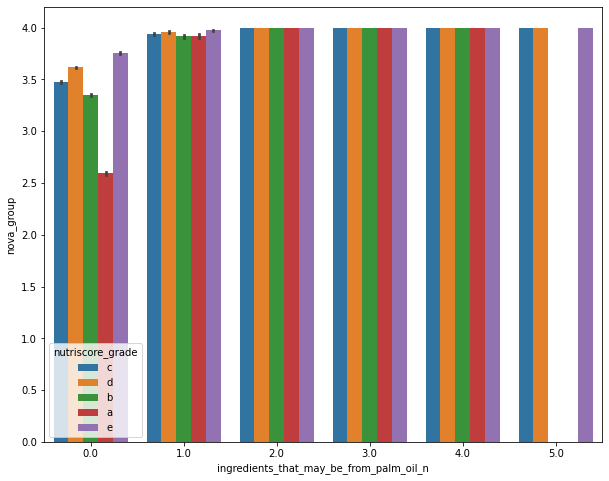

In [169]:
# Repartition des "oil de palme " et 'nova group', coloré par 'nutriscore'. Il n'y pas de 'oil' dans le group "a" de 'nutriscore'
plt.figure(figsize=(10,8))
sns.barplot(x='ingredients_that_may_be_from_palm_oil_n',y='nova_group',data = df_analyse_commune, hue ='nutriscore_grade')
plt.savefig('pict4.png')

In [170]:
# Enfin, nous remplirons toutes les valeurs manquantes avec 0.0.
df_analyse_commune['ingredients_that_may_be_from_palm_oil_n'].fillna(0.0, inplace=True)

### Pour info

<a name='section0'></a>
## Tableau 1
[analyse bivariés Fibre et Protéine ](#section1)

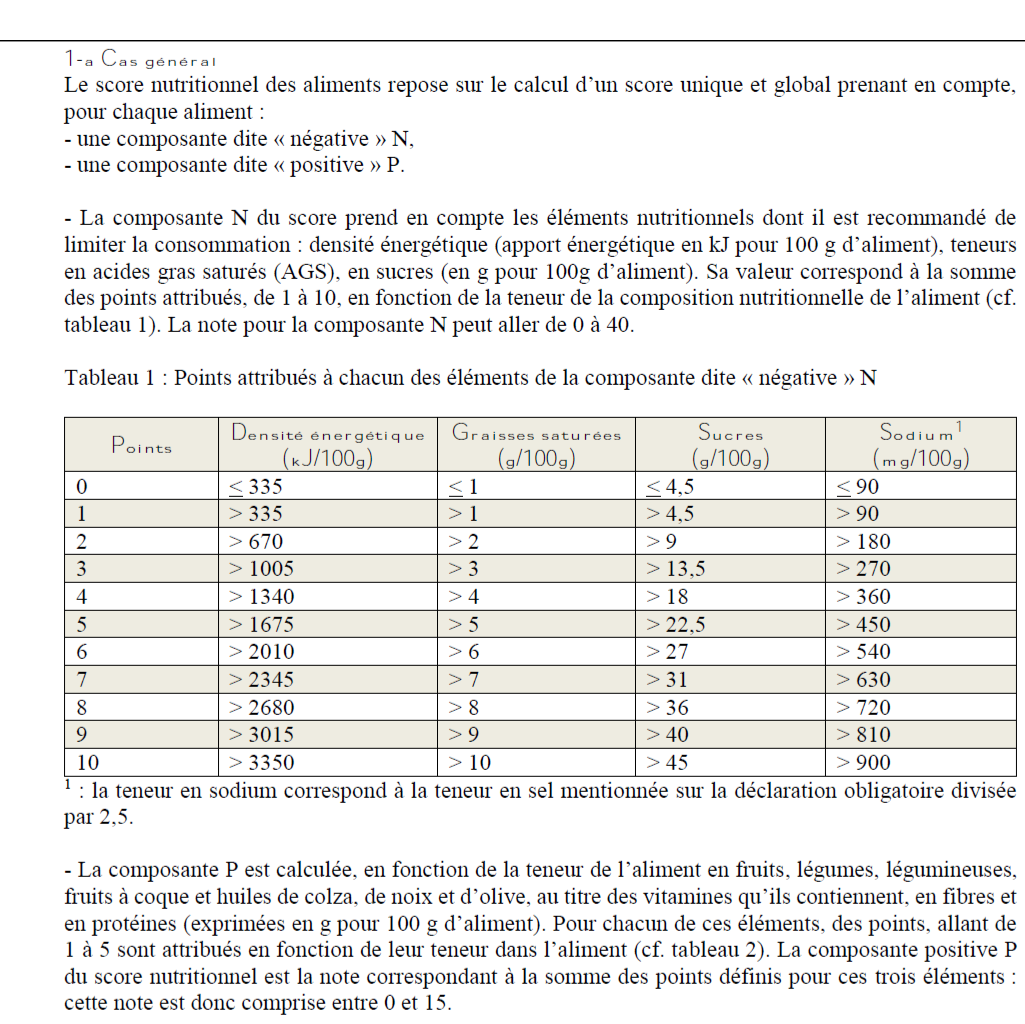

In [171]:
# Observons ces 4 colonnes 
col_4 = df_analyse_commune[['energy_100g','saturated-fat_100g','sugars_100g','sodium_100g']].head()
col_4

,energy_100g,saturated-fat_100g,sugars_100g,sodium_100g
code,,,,
3123349014556,197.0,0.000000,10.000000,0.000000
0829515300074,1943.0,3.571429,3.571429,1.035714
3155250003312,188.0,1.000000,4.800000,0.044000
0055742359855,126.0,0.000000,0.000000,0.120000
7702084137520,1550.0,0.000000,0.000000,0.000000


In [172]:
# Tant que le sodium em mg et les valeurs d'energy appartient pas a la même échelle on va standardiser les donnes
robust_valeurs=RobustScaler()

In [173]:
# standartisation de donnes
X_r =robust_valeurs.fit_transform(col_4)
X_r

array([[ 0.00000000e+00,  0.00000000e+00,  1.33928571e+00,
        -3.66666667e-01],
       [ 1.28193833e+00,  3.57142857e+00,  0.00000000e+00,
         8.26428571e+00],
       [-6.60792952e-03,  1.00000000e+00,  2.55952381e-01,
         0.00000000e+00],
       [-5.21292217e-02,  0.00000000e+00, -7.44047619e-01,
         6.33333333e-01],
       [ 9.93392070e-01,  0.00000000e+00, -7.44047619e-01,
        -3.66666667e-01]])

In [174]:
col_4_corr = pd.DataFrame(X_r, columns=[['energy_100g','saturated-fat_100g','sugars_100g','sodium_100g']]).corr()
col_4_corr

,energy_100g,saturated-fat_100g,sugars_100g,sodium_100g
energy_100g,1.000000,0.640251,-0.338893,0.686448
saturated-fat_100g,0.640251,1.000000,0.029656,0.955346
sugars_100g,-0.338893,0.029656,1.000000,-0.067313
sodium_100g,0.686448,0.955346,-0.067313,1.000000


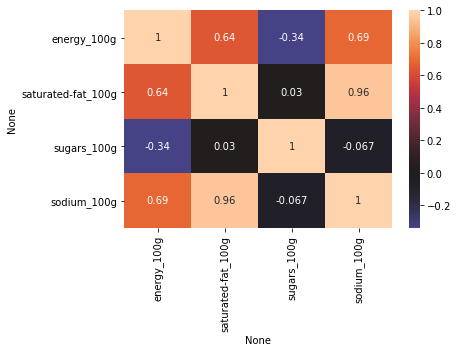

In [175]:
# assez logique que il y a corrélation entre "graisse saturé " et "energie", et pas de corrélation entre"sucre" et "sodium"
sns.heatmap(col_4_corr, center=0.0,annot=True)
plt.savefig('pict7.png')

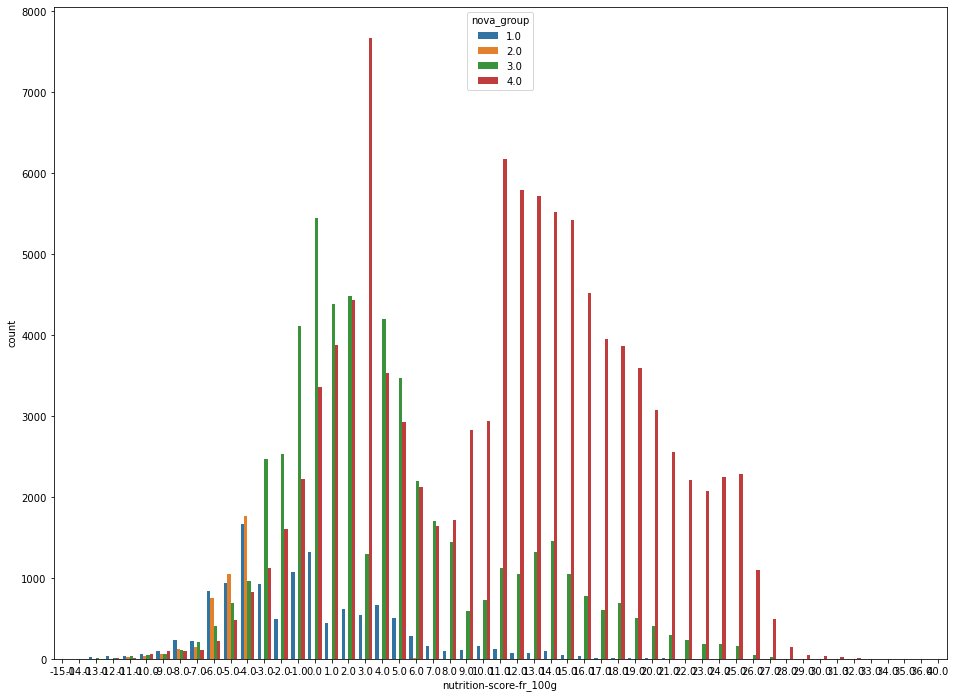

In [176]:
# On peut remarquer que cette distribution est divisée en 3 groupes différents : nutrscore <7,(-7,9) et >9 
plt.figure(figsize=(16,12))
sns.countplot(x='nutrition-score-fr_100g', data=df_analyse_commune, hue='nova_group')
plt.savefig('pict8.png')

In [177]:
# Verification
df_analyse_commune.groupby(by='nova_group')['nutrition-score-fr_100g'].agg('mean')

nova_group
1.0    -0.500540
2.0    -4.945295
3.0     4.407071
4.0    11.053534
Name: nutrition-score-fr_100g, dtype: float64

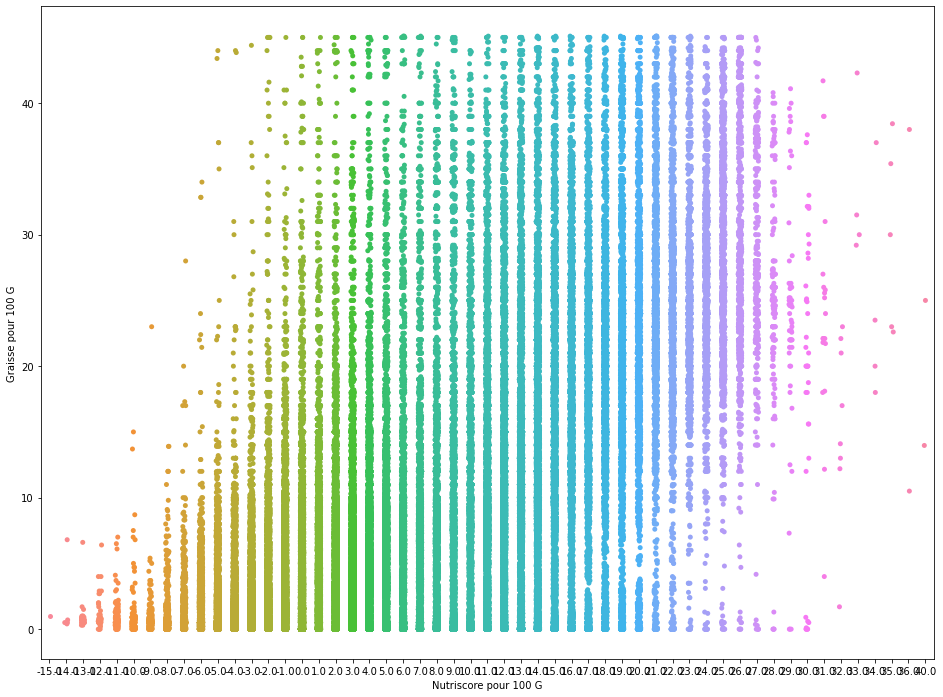

In [178]:
# La valeur de nutriscore est négative > pas beaucoup de graisse 
plt.figure(figsize=(16,12))
sns.stripplot(x="nutrition-score-fr_100g", y="fat_100g", data=df_analyse_commune)

## Graphic customisation
label = plt.xlabel("Nutriscore pour 100 G")
label.set_color("black")
label = plt.ylabel("Graisse pour 100 G")
label.set_color("black")

<Figure size 1152x864 with 0 Axes>

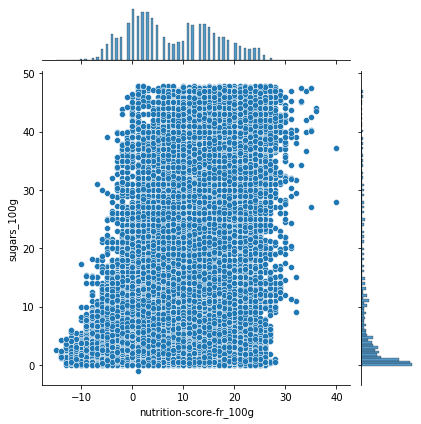

In [179]:
# Assez étrange  !! Je ne m'attendais pas voir la variance qui rassemble plutôt à une distribution normale
plt.figure(figsize=(16,12))
sns.jointplot(df_analyse_commune["nutrition-score-fr_100g"],df_analyse_commune["sugars_100g"])

### Matrice des corrélations

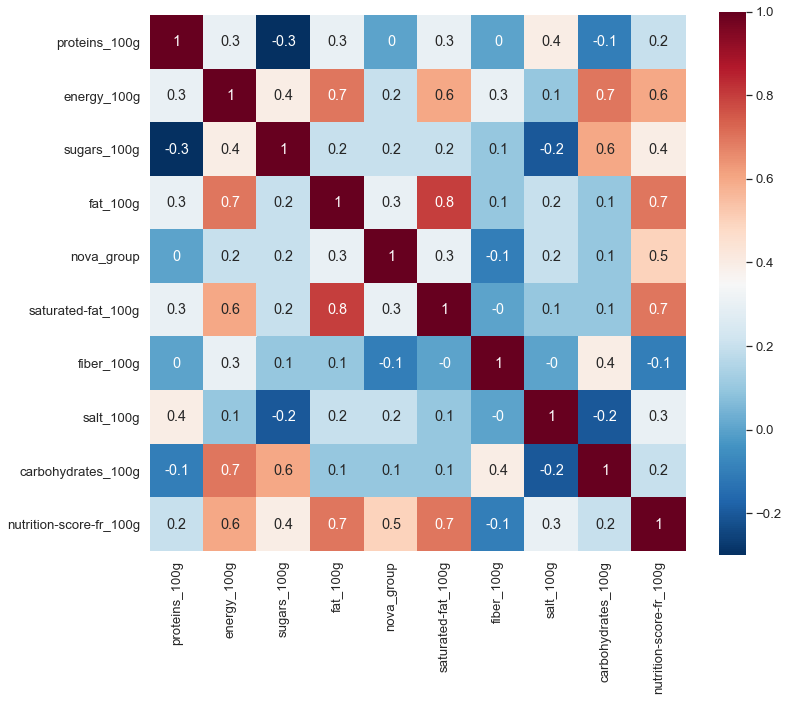

In [180]:
# On limite nos variables
dfanalyse_corr=df_analyse_commune[['proteins_100g','energy_100g','sugars_100g','fat_100g','nova_group','saturated-fat_100g','fiber_100g','salt_100g','carbohydrates_100g','nutrition-score-fr_100g']]
corr = dfanalyse_corr.corr(method='pearson')
corr = corr.round(1)
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)
sns.heatmap(corr,  annot = True ,vmax=1, cmap="RdBu_r",square=True)
plt.savefig('pict9.png')

### L'hippothèse

In [181]:
# Verification de valeur NaN
df_analyse_commune['ingredients_that_may_be_from_palm_oil_n'].isna().sum()

0

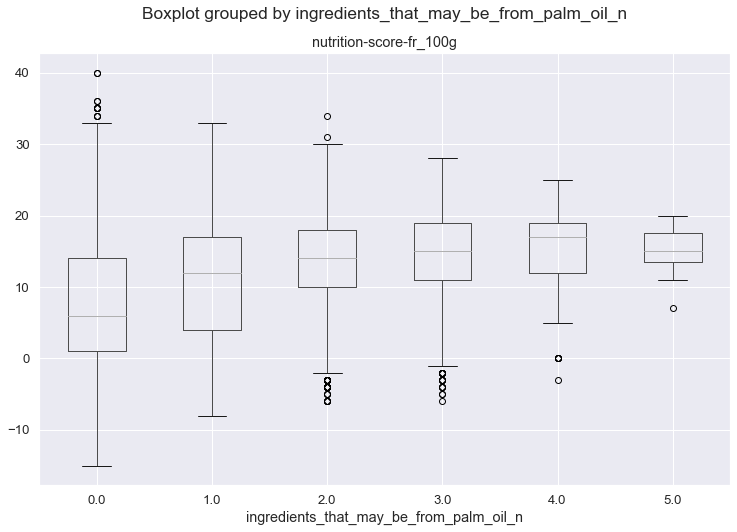

In [182]:
# Représentation graphique  
df_analyse_commune.boxplot('nutrition-score-fr_100g', by='ingredients_that_may_be_from_palm_oil_n', figsize=(12,8))
plt.savefig('pict10.png')

<AxesSubplot:xlabel='ingredients_that_may_be_from_palm_oil_n', ylabel='Density'>

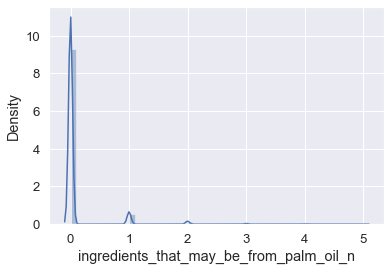

In [183]:
# La distribution de la valeur étudié 
sns.distplot(df_analyse_commune['ingredients_that_may_be_from_palm_oil_n'])

In [184]:
# division dans des proportions appropriées
proportion = []
for i in range(len(df_analyse_commune['ingredients_that_may_be_from_palm_oil_n'].unique())):
    sous_proportion =df_analyse_commune[df_analyse_commune['ingredients_that_may_be_from_palm_oil_n']== i]\
              ['nutrition-score-fr_100g'].values
    proportion.append(sous_proportion)

#### Notre valeur p est inférieure à 0,05, on rejete l'hypothèse nulle. C'est-à-dire que nous avons une dépendance entre ces variables

In [185]:
F,p = st.f_oneway(proportion[0],proportion[1],proportion[2])
p

0.0

### Model de PCA

In [186]:
# Preparation des donnes avant de les fournir à l'algorithme appropriée
df_analyse = df_analyse_commune.select_dtypes('float')

In [187]:
# Verif de NaN
df_analyse.isna().sum()


additives_n                                53525
ingredients_that_may_be_from_palm_oil_n        0
nova_group                                     0
ecoscore_score_fr                              0
energy_100g                                    0
fat_100g                                       0
saturated-fat_100g                             0
carbohydrates_100g                             0
sugars_100g                                    0
fiber_100g                                     0
proteins_100g                                  0
salt_100g                                      0
sodium_100g                                    0
nutrition-score-fr_100g                        0
dtype: int64

In [188]:
# Remplissage des valeurs
df_analyse['additives_n'] = df_analyse['additives_n'].fillna(df_analyse['additives_n'].mean())

In [189]:
# La taille du dataset avant de suppression des doublons 
df_analyse.shape

(172452, 14)

In [190]:
df_analyse.drop_duplicates(inplace=True)

In [191]:
# Apres
df_analyse.shape

(160802, 14)

In [192]:
# On a  2  lignes nulle 
df_analyse[df_analyse.sum(axis=1) == 0.0]

,additives_n,ingredients_that_may_be_from_palm_oil_n,nova_group,ecoscore_score_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
code,,,,,,,,,,,,,,
20163112,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.2,0.1,1.7,0.0,0.0,0.0,-8.0
3585810057217,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.0


In [193]:
# Suppression de ces 2 lignes
df_analyse.drop(index=['20163112','3585810057217'],inplace=True)

In [194]:
# Standardisation des données 
startard_valeurs=StandardScaler()

In [195]:
X =startard_valeurs.fit_transform(df_analyse)

In [196]:
# Laissons 75% pour commencer
model_pca=PCA(n_components=0.75)

In [197]:
# Entraînement 
X_pca = model_pca.fit_transform(X)

In [198]:
# Il nous a proposé de réduire de 16 à 6
n_comp = model_pca.n_components_
n_comp

5

In [199]:
# Affichage
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [200]:
model_pca.explained_variance_ratio_*100

array([28.04246556, 18.31820917, 11.83252371,  9.30616554,  7.50788447])

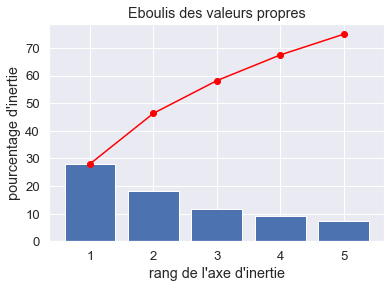

<Figure size 432x288 with 0 Axes>

In [201]:
# Pas trop de différence, à l'exception possible des deux premiers, qui peuvent influencer la décision.
display_scree_plot(model_pca)
plt.savefig('pict11.png')

In [202]:
# AffiAffichage du cercle de corrélation 
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

In [203]:
pcs=model_pca.components_

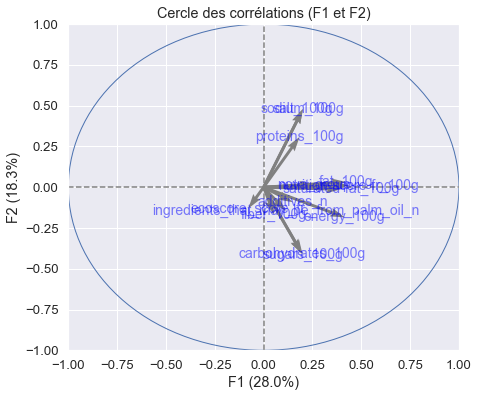

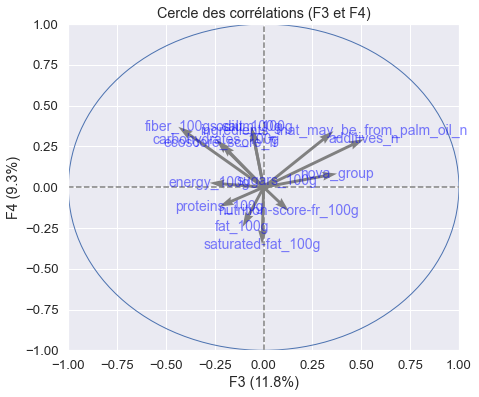

In [204]:
display_circles(pcs, n_comp,model_pca, [(0,1),(2,3),(4,5)], labels=np.array(df_analyse.columns))

In [205]:
# Utilisation de KMeans pour regrouper nos donnes
model_kmeans = KMeans(n_clusters=3)

In [206]:
model_kmeans.fit(df_analyse)

KMeans(n_clusters=3)

In [207]:
pred=model_kmeans.predict(df_analyse)
pred

array([2, 1, 2, ..., 1, 0, 0])

In [208]:
df_analyse['cluster'] = pred

In [209]:
# Voici le premier clusteur
group_1=df_analyse[df_analyse['cluster']==1][['nutrition-score-fr_100g','nova_group','saturated-fat_100g',\
                                             'sugars_100g','salt_100g','cluster']]
group_1.describe()

,nutrition-score-fr_100g,nova_group,saturated-fat_100g,sugars_100g,salt_100g,cluster
count,45933.000000,45933.000000,45933.000000,45933.000000,45933.000000,45933.0
mean,13.599808,3.566455,6.648552,16.561796,0.949914,1.0
std,9.073989,0.811992,5.687583,14.815988,1.211762,0.0
min,-11.000000,1.000000,0.000000,0.000000,0.000000,1.0
25%,8.000000,3.000000,1.500000,2.000000,0.150000,1.0
50%,15.000000,4.000000,4.700000,14.000000,0.610000,1.0
75%,21.000000,4.000000,12.000000,29.030000,1.210000,1.0
max,40.000000,4.000000,18.900000,47.900000,15.000000,1.0


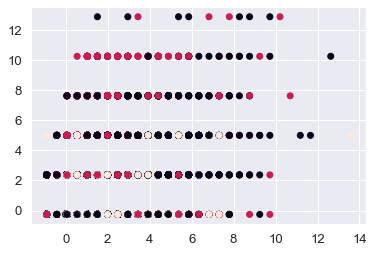

In [210]:
plt.scatter(X[:,0], X[:,1], c=pred)

In [211]:
model_kmeans.cluster_centers_

array([[2.19399034e+00, 1.42080065e-01, 3.64752980e+00, 3.00825099e+01,
        9.76866909e+02, 1.25916504e+01, 4.82946454e+00, 1.84622114e+01,
        6.71511727e+00, 1.80809935e+00, 1.07125720e+01, 1.40125793e+00,
        5.60503170e-01, 9.43208720e+00],
       [2.01499008e+00, 1.47688226e-01, 3.56670001e+00, 3.76191118e+01,
        1.80631134e+03, 1.87806987e+01, 6.65129808e+00, 5.21385451e+01,
        1.65498212e+01, 2.82121532e+00, 9.43731484e+00, 9.50623940e-01,
        3.80249576e-01, 1.36048236e+01],
       [1.57599353e+00, 2.99697260e-02, 3.23857119e+00, 3.65930963e+01,
        3.17012560e+02, 2.57584841e+00, 9.51777890e-01, 9.03365132e+00,
        5.97465656e+00, 1.50264262e+00, 4.67066278e+00, 6.59129705e-01,
        2.63651882e-01, 2.92583634e+00]])

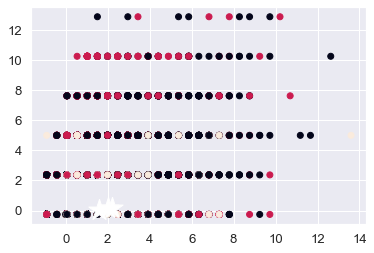

In [212]:
plt.scatter(X[:,0], X[:,1], c=pred)
plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], c='w',s=500,marker='*')
plt.savefig('pict12.png')

In [213]:
model_kmeans.inertia_

8279973745.095353

In [214]:
my_inertia = []
for k in range(1,7):
    model_kmeans_new = KMeans(n_clusters=k).fit(X)
    my_inertia.append(model_kmeans_new.inertia_)

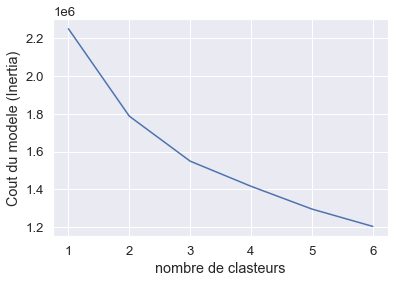

In [215]:
# L'algorithme aussi propose 2 ou 3 clusteurs
plt.plot(range(1,7),my_inertia)
plt.xlabel('nombre de clasteurs')
plt.ylabel('Cout du modele (Inertia)')
plt.savefig('pict13.png')